잡케어 추천시스템 경진대회
--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
sub_1=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sample_submission.csv")
test=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/test.csv", parse_dates=["contents_open_dt"])
train=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/train.csv", parse_dates=["contents_open_dt"])
d_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_D_코드.csv", index_col=0).T.to_dict()
h_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_H_코드.csv", index_col=0).T.to_dict()
l_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_L_코드.csv", index_col=0).T.to_dict()

In [4]:
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드']) 
    return df

train = add_code(train, d_code, h_code, l_code)
test= add_code(test, d_code, h_code, l_code)

**n : 세분류, s: 소분류, m: 중분류, l: 대분류**

- 참고한 링크: https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent


In [5]:
train["date"]=train["contents_open_dt"].dt.strftime("%d")
train["hour"]=train["contents_open_dt"].dt.strftime("%H")
train["day"]=train["contents_open_dt"].dt.strftime("%A")

train["date"]=train["date"].astype(int)
train["hour"]=train["hour"].astype(int)

In [6]:
test["date"]=test["contents_open_dt"].dt.strftime("%d")
test["hour"]=test["contents_open_dt"].dt.strftime("%H")
test["day"]=test["contents_open_dt"].dt.strftime("%A")

test["date"]=test["date"].astype(int)
test["hour"]=test["hour"].astype(int)

In [7]:
train.drop("contents_open_dt", axis=1, inplace=True)
test.drop("contents_open_dt", axis=1, inplace=True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# 문제정의

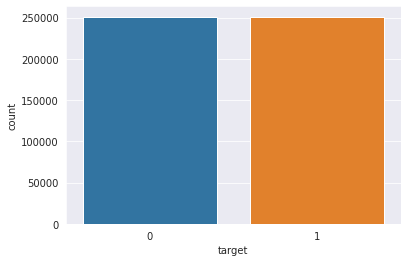

In [ ]:
sns.countplot(train['target'])

([<matplotlib.patches.Wedge at 0x7f9390175ed0>,
 [Text(-1.0831321475843978, 0.1918977615013026, 'target_0'),
  Text(1.0831321475843978, -0.19189776150130258, 'target_1')],
 [Text(-0.5907993532278533, 0.10467150627343777, '50.0%'),
  Text(0.5907993532278533, -0.10467150627343776, '50.0%')])

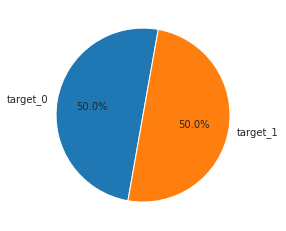

In [ ]:
zero=len(train.loc[train['target']==0].index)
one=len(train.loc[train['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

- 언뜻 보면, train 데이터의 종속변수인 target이 50:50으로 단순한 이진분류 문제 같지만 실제는 그렇지 않음.

실제 제출했던 case1의 target 분포와 실제 점수

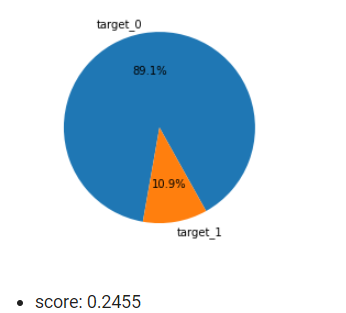

실제 제출했던 case2의 target 분포와 실제 점수

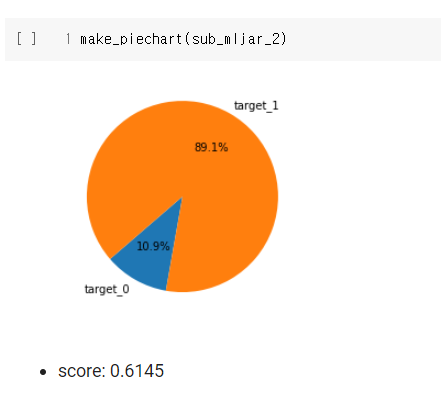

제출했던 당시 target별 데이터 개수와 실제 점수

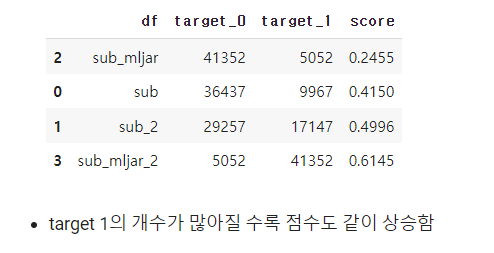

이를 통해 실제 train 데이터에서 target 데이터의 0과 1의 개수는 balanced하지만, test 데이터에서 target의 0과 1의 개수는 imbalanced한 것을 알 수 있음.

> **OverSampling or UnderSampling?**
- train 데이터에서 imbalanced 할 경우, OverSampling 혹은 UnderSampling하여 문제를 해결하면 되지만, 실제 대회 데이터인 test 데이터의 경우 target이 주어지지 않고 어떤 데이터가 0인지 1인지 알 수 없어, OverSampling 혹은 UnderSampling을 적용할 수 없음.

**Q1**

XGBoost나 Catboost 등 좋은 모델로 train 데이터를 잘 학습을 하면, test 데이터 target이 불균형해도 잘 맞출 수 있는 것 아닌가?

**A1**

그렇지 않음. 

- 근거1: train 데이터를 train데이터와 test 데이터로 나누었을 때, f1_score가 처음에 0.681정도가 나왔었음. 이를 AutoML로 ensemble, stacking 등 고도화 기법으로 튜닝한 결과 Ensemble_Stacked 모델의 f1_score가 0.72로 상승하였음. 그러나, 실제로 제출했을 때, 점수는 거의 반타작으로 떨어졌음. 

- 근거2: train데이터를 train데이터와 test 데이터로 나눈 뒤, test 데이터를 의도적으로 target이 0인 데이터들을 대부분 삭제하여 target 1의 경우 83.4%, 0인 경우, 16.6%으로 불균형하게 만들었음. 그 결과, CatBoostClassifer, XGBoostClassifer 보다 오히려, ridgeCV, lassoCV, Gaussian Naive Bayes 결과가 더 좋게 나왔음.



**개인적인 추측**

이 문제는 단순히 이진분류 하는 문제로 보이지만, 실제 문제는 train 데이터의 종속변수는 balanced한데, test 데이터가 imbalanced 하다면, 이 문제를 어떻게 해결하는지에 대한 문제이다.

**추가적인 추측**
1. train 데이터도 불균형 데이터인데, 이를 보완하기 위해, target이 0인 데이터가 의도적으로 OverSampling 되었을 수도 있다.

2. test 데이터가 불균형 데이터여도, train 데이터와 특성이 유사하다면, test 데이터에서도 좋은 결과가 나와야 하며, 모델이 고도화 될 수록, 점수도 같이 정비례하여 올라가야 할 것이다. 그러나, 모델이 고도화 될 수록 오히려 점수는 떨어지는 양상을 보인다. 이는 train에서 target이 1인 데이터의 특성을 A, 0인 데이터의 특성을 B라고 했을 때, 실제 test 데이터의 특성은 B인데도 불구하고, 실제 target값은 1일 것으로 유추된다. < 그래프로 전부 확인 해본 결과 잘 모르겠음. >

- 이는 검증이 필요함. (train의 target이 0인 데이터와 test 데이터의 특징 비교 필요함.)

- 추가적인 추측 2번 근거(Ensemble_Stacked)

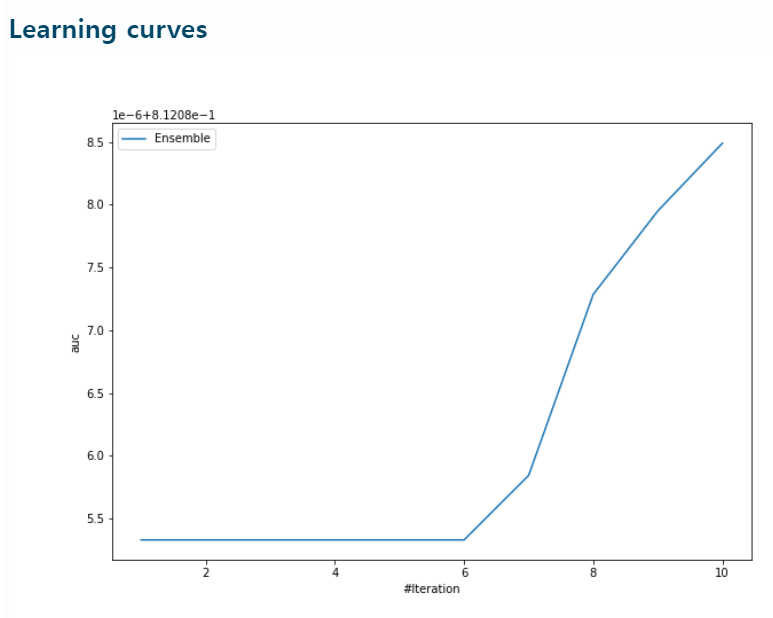


- Learning curves는 올라가는데, 실제 score는 정반대로 떨어짐.

**문제 핵심**

1. train데이터 target이 balanced하지만, test데이터의 target이 imbalanced하다면, 이 문제를 어떻게 극복할 것인가?

2. train데이터에서 target이 0인 데이터의 특성과 test의 데이터의 특성이 유사한데(검증필요), 실제 test의 target이 대부분 1이라면 이를 어떻게 극복할 것인가?

# FINAL EDA (graph)

- 그렇게 시작된 마지막 EDA 작업

Train & Test 데이터 비교 EDA
--

**주요 포인트**

1. Train의 target이 0인 데이터와 Test 데이터의 특성은 유사한 가?

2. 1번이 맞다면 Train의 target이 1인 데이터와 Test 데이터의 특성이 다른 것도 맞는가?

- 검증되면 문제 핵심 1,2번 둘 다 맞는 얘기가 될 것으로 추측

In [9]:
train_0=train.loc[train['target']==0]
train_1=train.loc[train['target']==1]

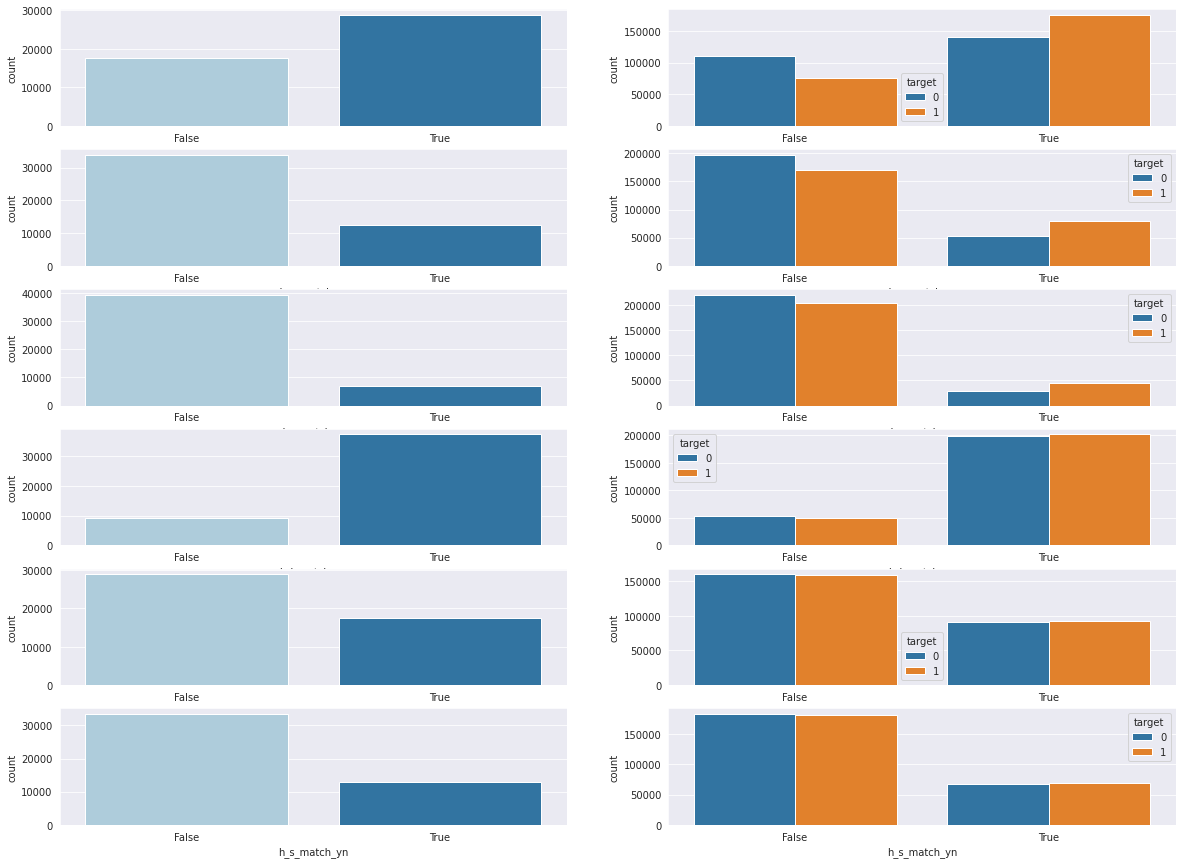

In [ ]:
figure, ((ax1, ax2), (ax3,ax4), (ax5, ax6), (ax7, ax8), (ax9,ax10), (ax11, ax12)) =plt.subplots(nrows=6,ncols=2)
figure.set_size_inches(20,15)

sns.countplot(test['d_l_match_yn'], ax=ax1, palette="Paired")
sns.countplot(train['d_l_match_yn'], hue=train['target'], ax=ax2)

sns.countplot(test['d_m_match_yn'], ax=ax3, palette="Paired")
sns.countplot(train['d_m_match_yn'], hue=train['target'], ax=ax4)

sns.countplot(test['d_s_match_yn'], ax=ax5, palette="Paired")
sns.countplot(train['d_s_match_yn'], hue=train['target'], ax=ax6)

sns.countplot(test['h_l_match_yn'], ax=ax7, palette="Paired")
sns.countplot(train['h_l_match_yn'], hue=train['target'], ax=ax8)

sns.countplot(test['h_m_match_yn'], ax=ax9, palette="Paired")
sns.countplot(train['h_m_match_yn'], hue=train['target'], ax=ax10)

sns.countplot(test['h_s_match_yn'], ax=ax11, palette="Paired")
sns.countplot(train['h_s_match_yn'], hue=train['target'], ax=ax12)

sns.set_style("darkgrid")

회원 속성
--

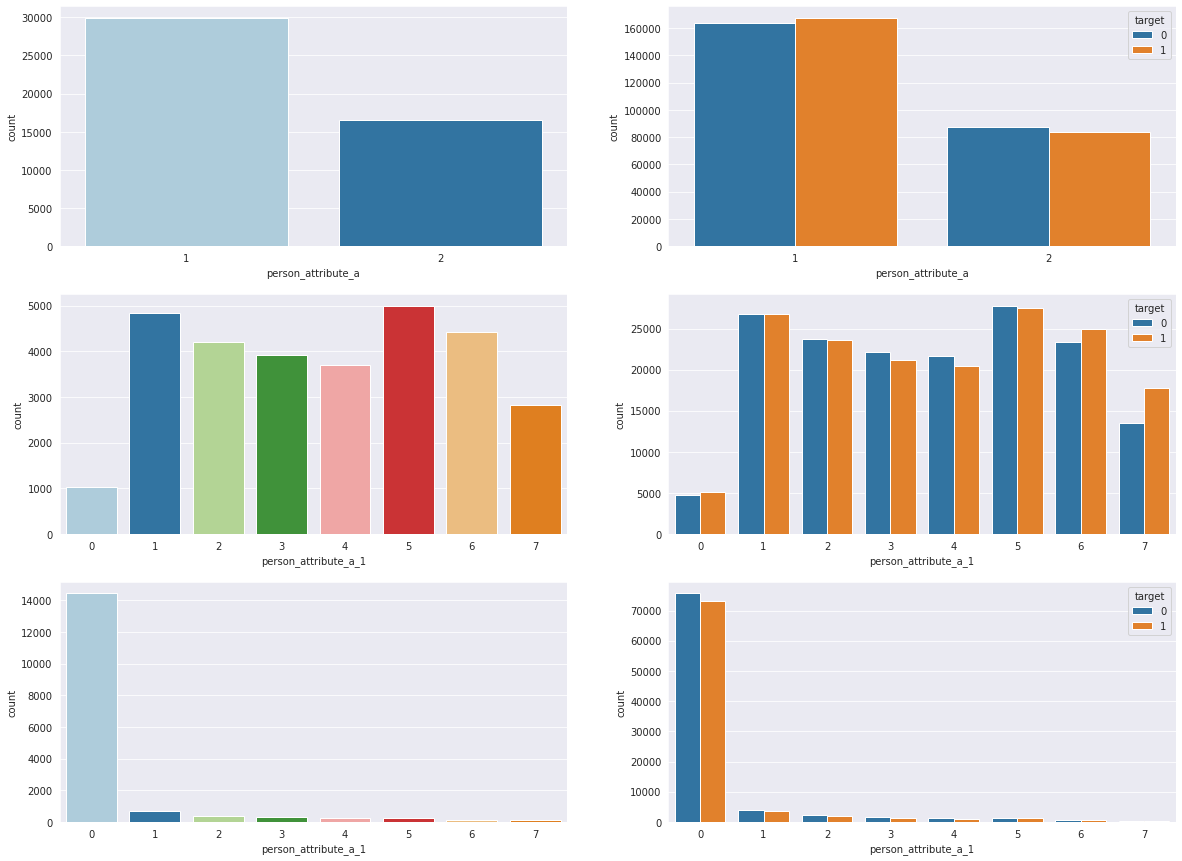

In [ ]:
n1=train.loc[train["person_attribute_a"]==1]
n2=train.loc[train["person_attribute_a"]==2]
e1=test.loc[test["person_attribute_a"]==1]
e2=test.loc[test["person_attribute_a"]==2]

figure, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.countplot(test['person_attribute_a'], ax=ax1, palette="Paired")
sns.countplot(train['person_attribute_a'], hue=train['target'], ax=ax2)

sns.countplot(e1['person_attribute_a_1'], ax=ax3, palette="Paired")
sns.countplot(n1['person_attribute_a_1'], hue=n1['target'], ax=ax4)

sns.countplot(e2['person_attribute_a_1'], ax=ax5, palette="Paired")
sns.countplot(n2['person_attribute_a_1'], hue=n2['target'], ax=ax6)


sns.set_style("darkgrid")

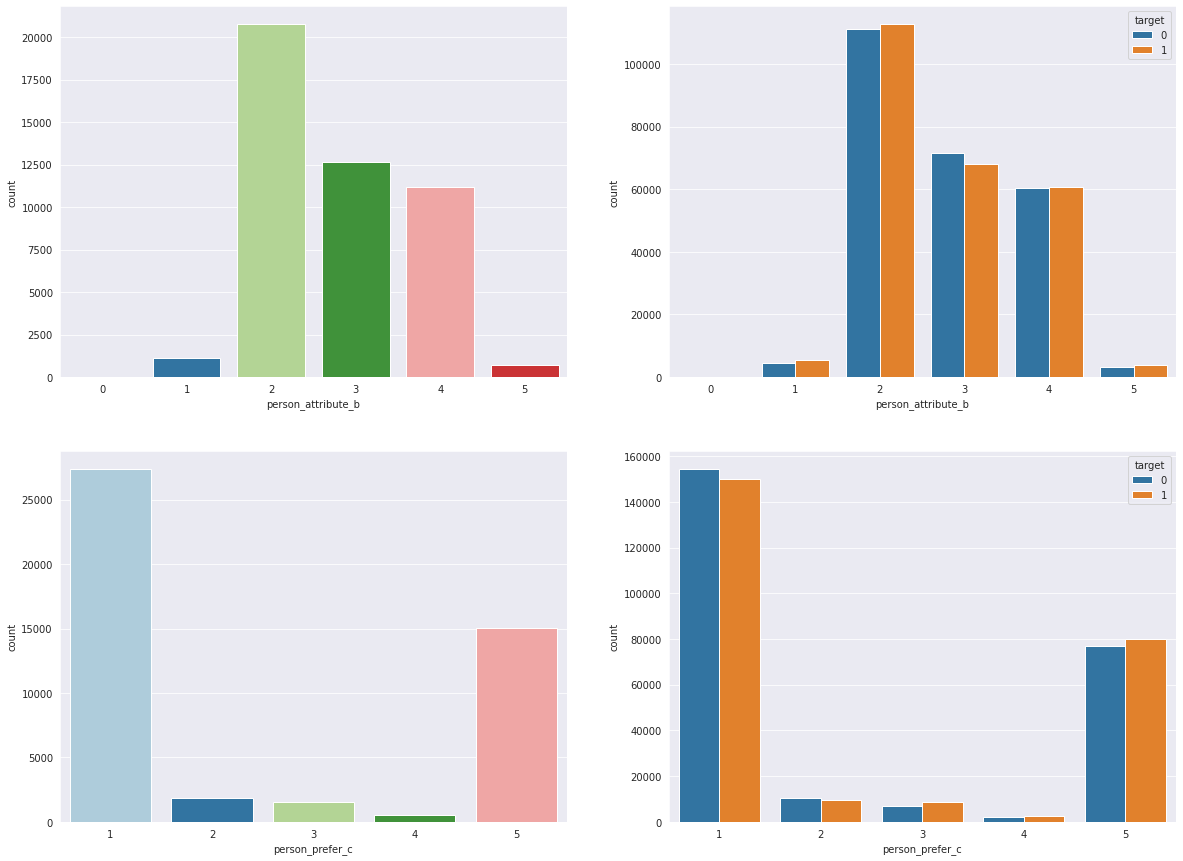

In [ ]:
figure, ((ax1, ax2), (ax3,ax4)) =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,15)

sns.countplot(test['person_attribute_b'], ax=ax1, palette="Paired")
sns.countplot(train['person_attribute_b'], hue=train['target'], ax=ax2)

sns.countplot(test['person_prefer_c'], ax=ax3, palette="Paired")
sns.countplot(train['person_prefer_c'], hue=train['target'], ax=ax4)

sns.set_style("darkgrid")

[Text(0.5, 1.0, 'train_1')]

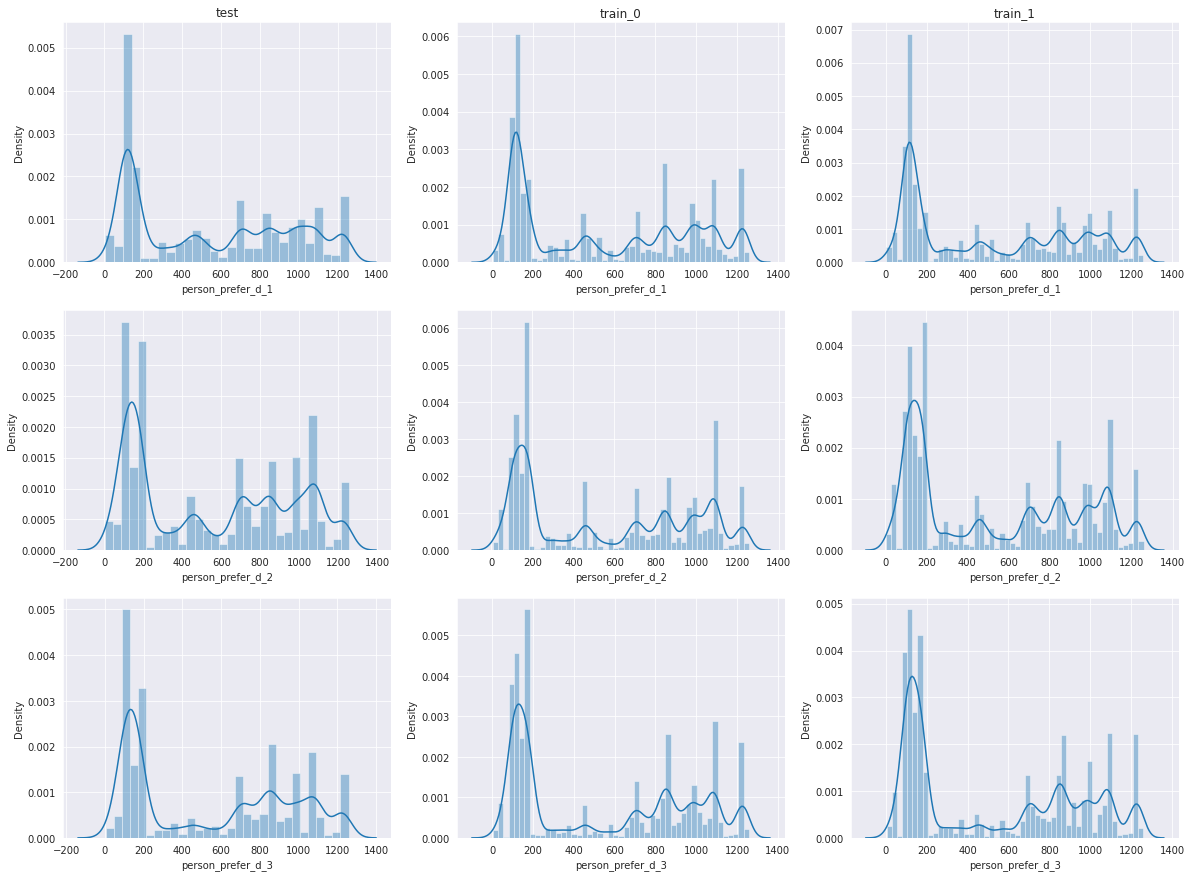

In [ ]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8,ax9)) =plt.subplots(nrows=3,ncols=3)
figure.set_size_inches(20,15)

sns.distplot(test['person_prefer_d_1'], ax=ax1)
sns.distplot(train_0['person_prefer_d_1'], ax=ax2)
sns.distplot(train_1['person_prefer_d_1'], ax=ax3)

sns.distplot(test['person_prefer_d_2'], ax=ax4)
sns.distplot(train_0['person_prefer_d_2'], ax=ax5)
sns.distplot(train_1['person_prefer_d_2'], ax=ax6)

sns.distplot(test['person_prefer_d_3'], ax=ax7)
sns.distplot(train_0['person_prefer_d_3'], ax=ax8)
sns.distplot(train_1['person_prefer_d_3'], ax=ax9)

sns.set_style("darkgrid")
ax1.set(title="test")
ax2.set(title='train_0')
ax3.set(title='train_1')

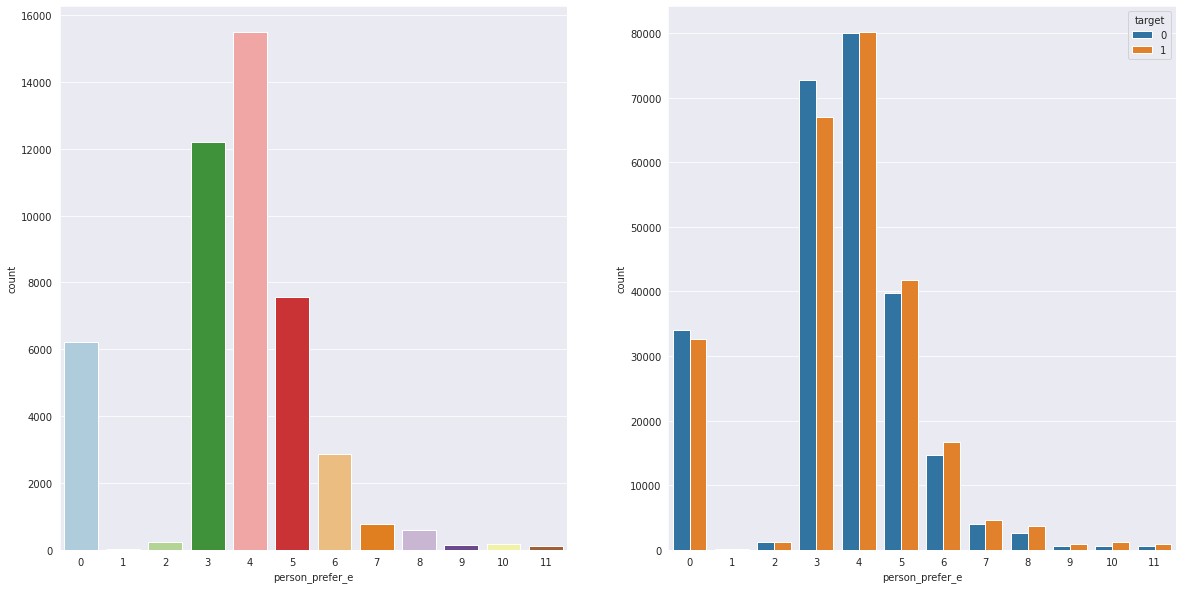

In [ ]:
figure, ((ax1, ax2)) =plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,10)

sns.countplot(test['person_prefer_e'], ax=ax1, palette="Paired")
sns.countplot(train['person_prefer_e'], hue=train['target'], ax=ax2)

sns.set_style("darkgrid")

In [ ]:
print(train_0["person_prefer_f"].unique())
print(train_1["person_prefer_f"].unique())
print(test["person_prefer_f"].unique())

[1]
[1]
[1]


- 필요없는 칼럼인듯

In [ ]:
print(train_0["person_prefer_g"].unique())
print(train_1["person_prefer_g"].unique())
print(test["person_prefer_g"].unique())

[1]
[1]
[1]


- 마찬가지로 필요없는 칼럼인 듯

[Text(0.5, 1.0, 'train_1')]

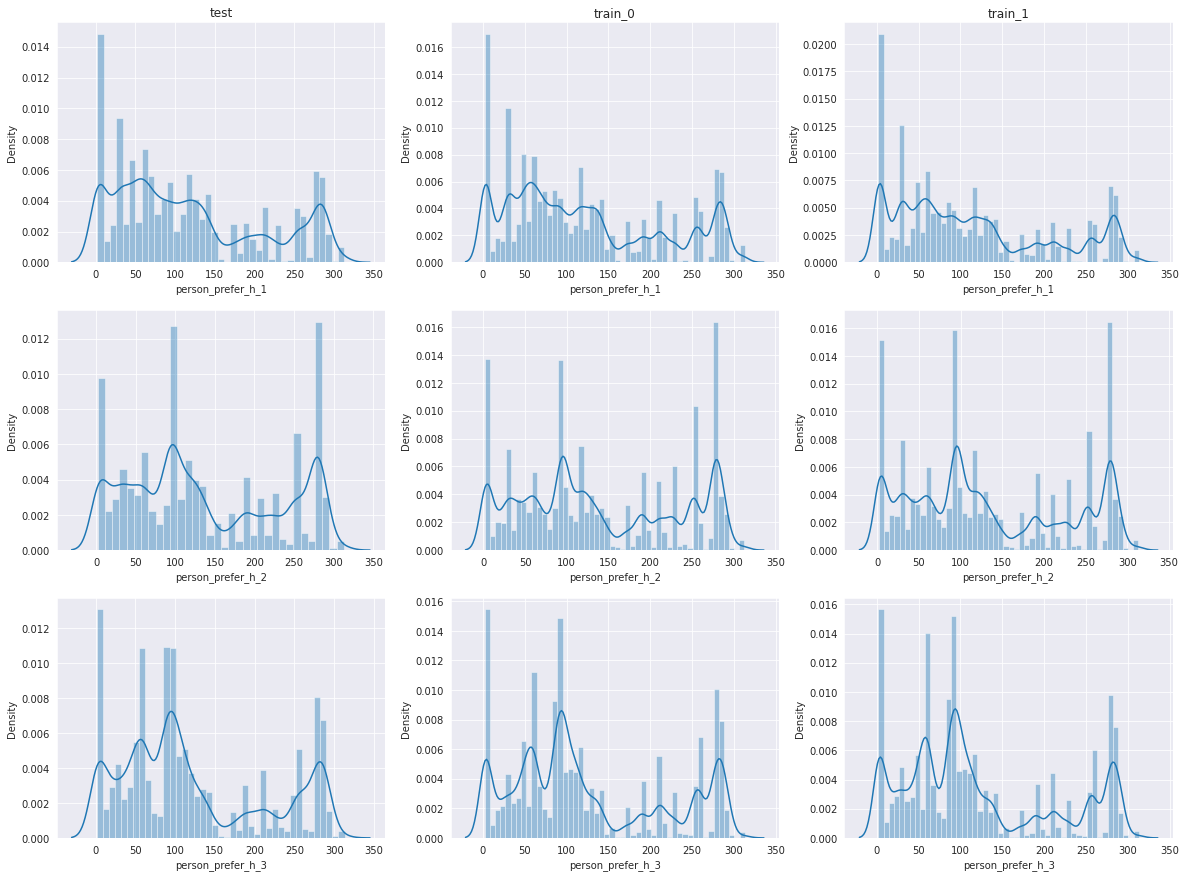

In [ ]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8,ax9)) =plt.subplots(nrows=3,ncols=3)
figure.set_size_inches(20,15)

sns.distplot(test['person_prefer_h_1'], ax=ax1)
sns.distplot(train_0['person_prefer_h_1'], ax=ax2)
sns.distplot(train_1['person_prefer_h_1'], ax=ax3)

sns.distplot(test['person_prefer_h_2'], ax=ax4)
sns.distplot(train_0['person_prefer_h_2'], ax=ax5)
sns.distplot(train_1['person_prefer_h_2'], ax=ax6)

sns.distplot(test['person_prefer_h_3'], ax=ax7)
sns.distplot(train_0['person_prefer_h_3'], ax=ax8)
sns.distplot(train_1['person_prefer_h_3'], ax=ax9)

sns.set_style("darkgrid")
ax1.set(title="test")
ax2.set(title='train_0')
ax3.set(title='train_1')

- person_prefer_h_1의 경우만, test랑 train_0이 좀 비슷한듯? (100에서 150 구간)

컨텐츠 속성
--

[Text(0.5, 1.0, 'train_1')]

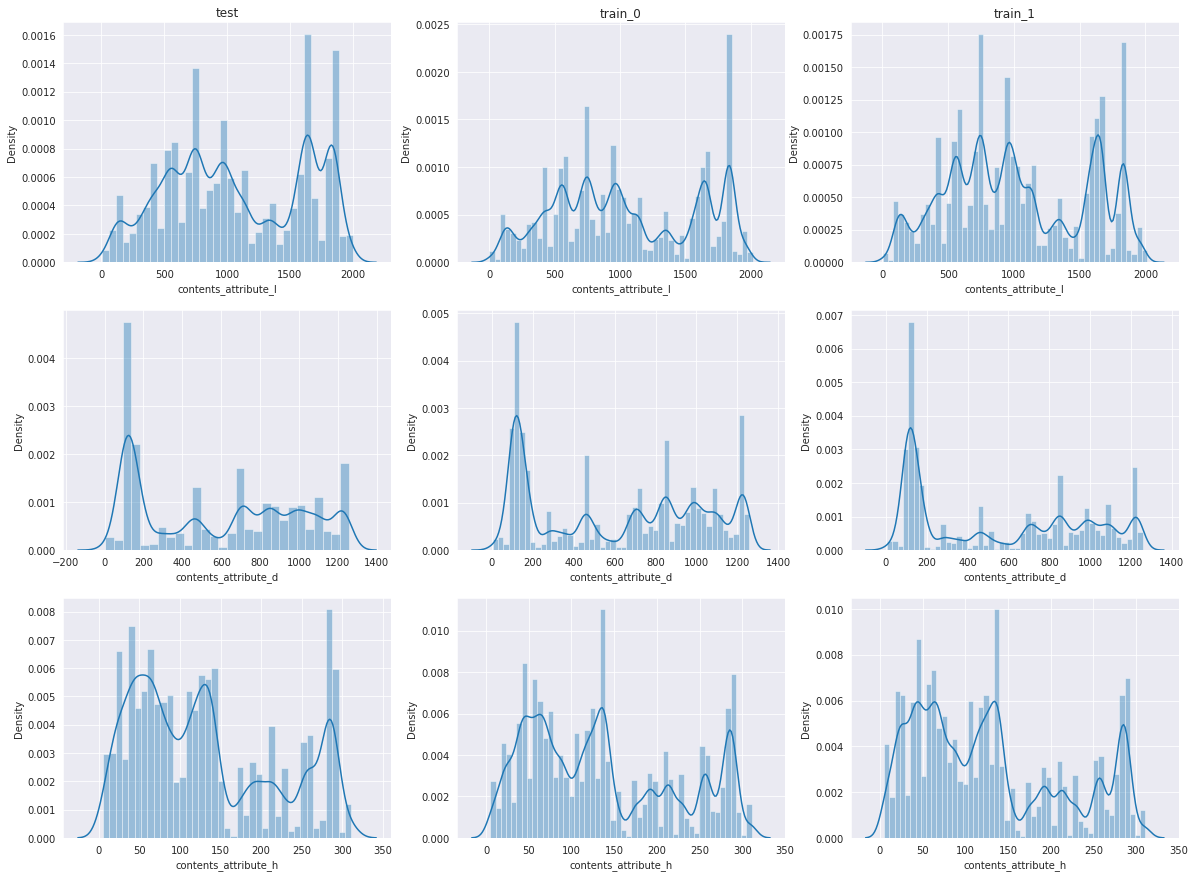

In [ ]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8,ax9)) =plt.subplots(nrows=3,ncols=3)
figure.set_size_inches(20,15)

sns.distplot(test["contents_attribute_l"], ax=ax1)
sns.distplot(train_0["contents_attribute_l"], ax=ax2)
sns.distplot(train_1["contents_attribute_l"], ax=ax3)

sns.distplot(test["contents_attribute_d"], ax=ax4)
sns.distplot(train_0["contents_attribute_d"], ax=ax5)
sns.distplot(train_1["contents_attribute_d"], ax=ax6)

sns.distplot(test["contents_attribute_h"], ax=ax7)
sns.distplot(train_0["contents_attribute_h"], ax=ax8)
sns.distplot(train_1["contents_attribute_h"], ax=ax9)

sns.set_style("darkgrid")
ax1.set(title="test")
ax2.set(title='train_0')
ax3.set(title='train_1')

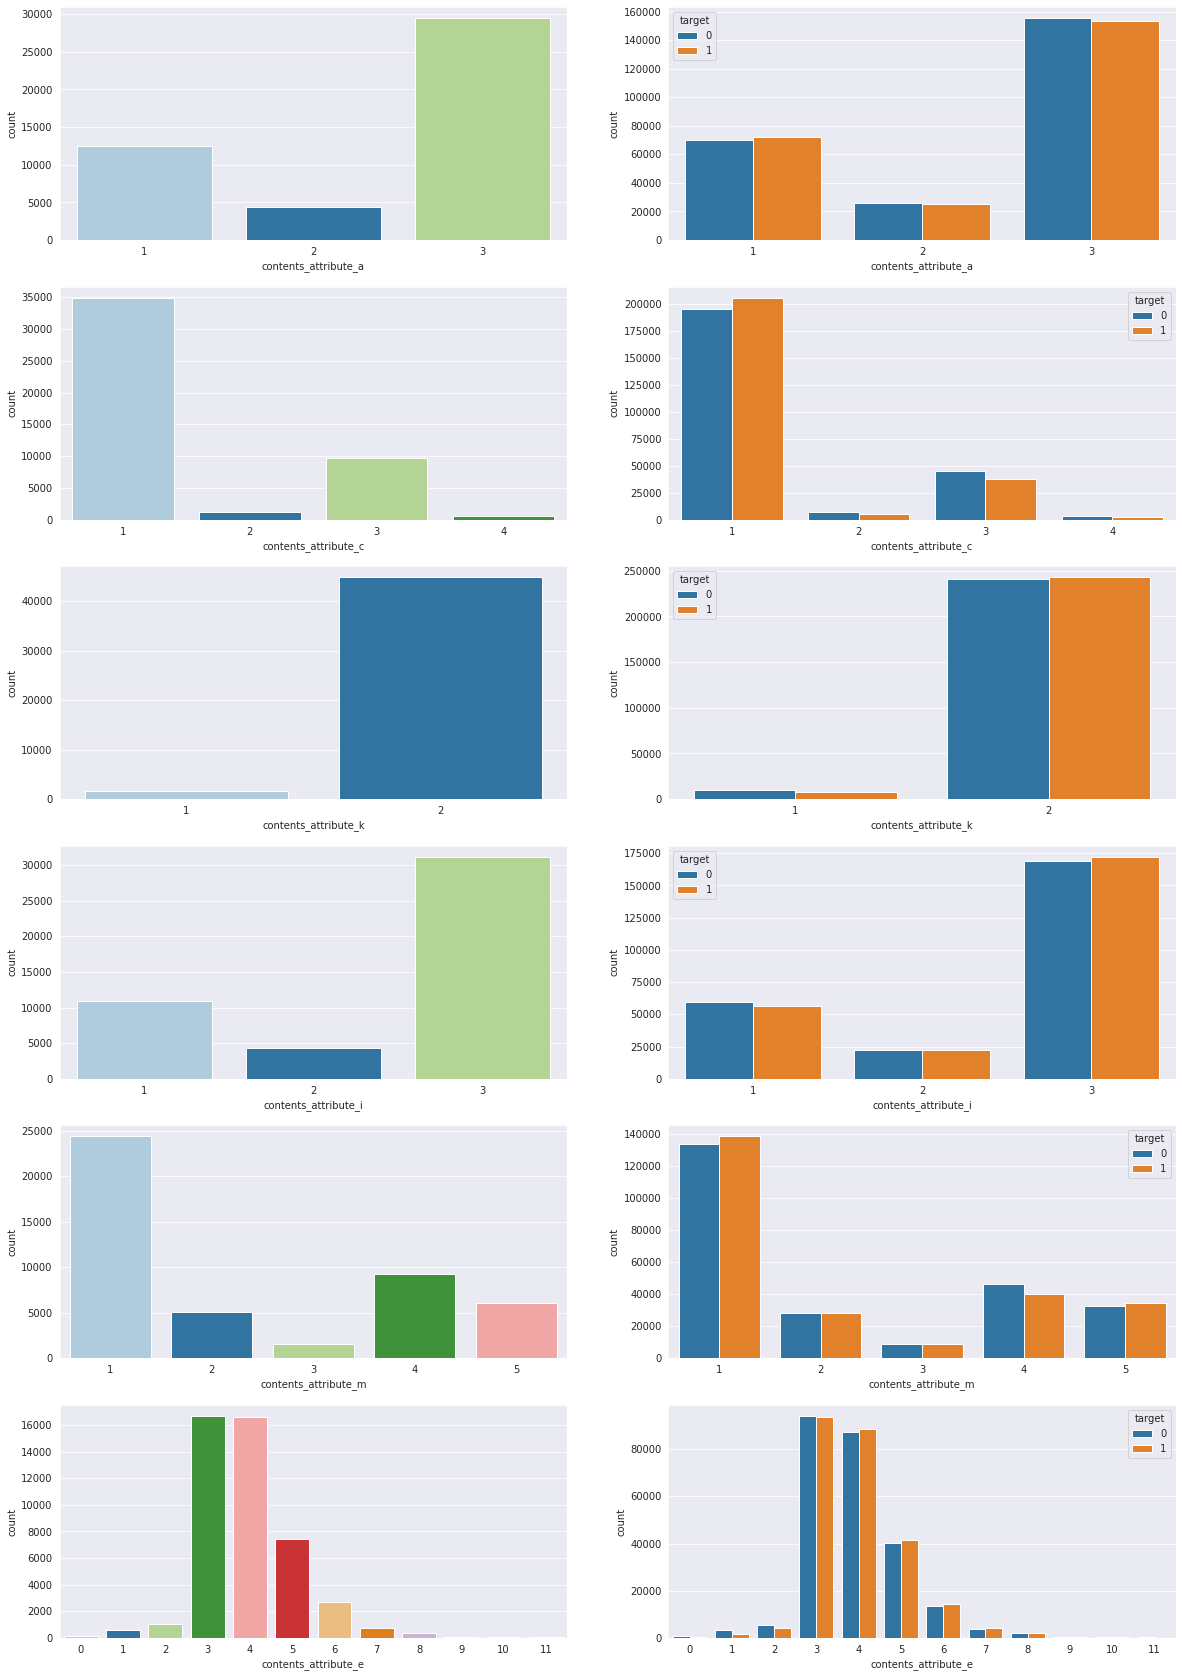

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) =plt.subplots(nrows=6,ncols=2)
figure.set_size_inches(20,30)

sns.countplot(test["contents_attribute_a"], ax=ax1, palette="Paired")
sns.countplot(train["contents_attribute_a"], hue=train['target'], ax=ax2)
sns.countplot(test["contents_attribute_c"], ax=ax3, palette="Paired")
sns.countplot(train["contents_attribute_c"], hue=train['target'], ax=ax4)
sns.countplot(test["contents_attribute_k"], ax=ax5, palette="Paired")
sns.countplot(train["contents_attribute_k"], hue=train['target'], ax=ax6)
sns.countplot(test["contents_attribute_i"], ax=ax7, palette="Paired")
sns.countplot(train["contents_attribute_i"], hue=train['target'], ax=ax8)
sns.countplot(test["contents_attribute_m"], ax=ax9, palette="Paired")
sns.countplot(train["contents_attribute_m"], hue=train['target'], ax=ax10)
sns.countplot(test["contents_attribute_e"], ax=ax11, palette="Paired")
sns.countplot(train["contents_attribute_e"], hue=train['target'], ax=ax12)

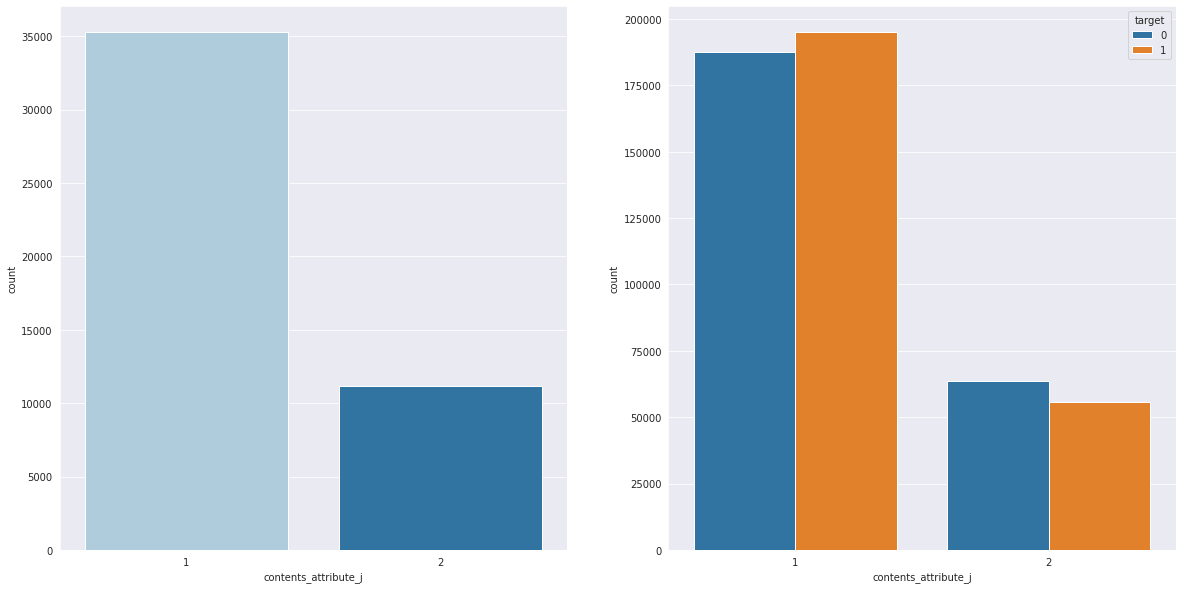

In [ ]:
figure, ((ax1, ax2)) =plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,10)

sns.countplot(test['contents_attribute_j'], ax=ax1, palette="Paired")
sns.countplot(train['contents_attribute_j'], hue=train['target'], ax=ax2)

sns.set_style("darkgrid")

[Text(0.5, 1.0, 'contents_attribute_j=2')]

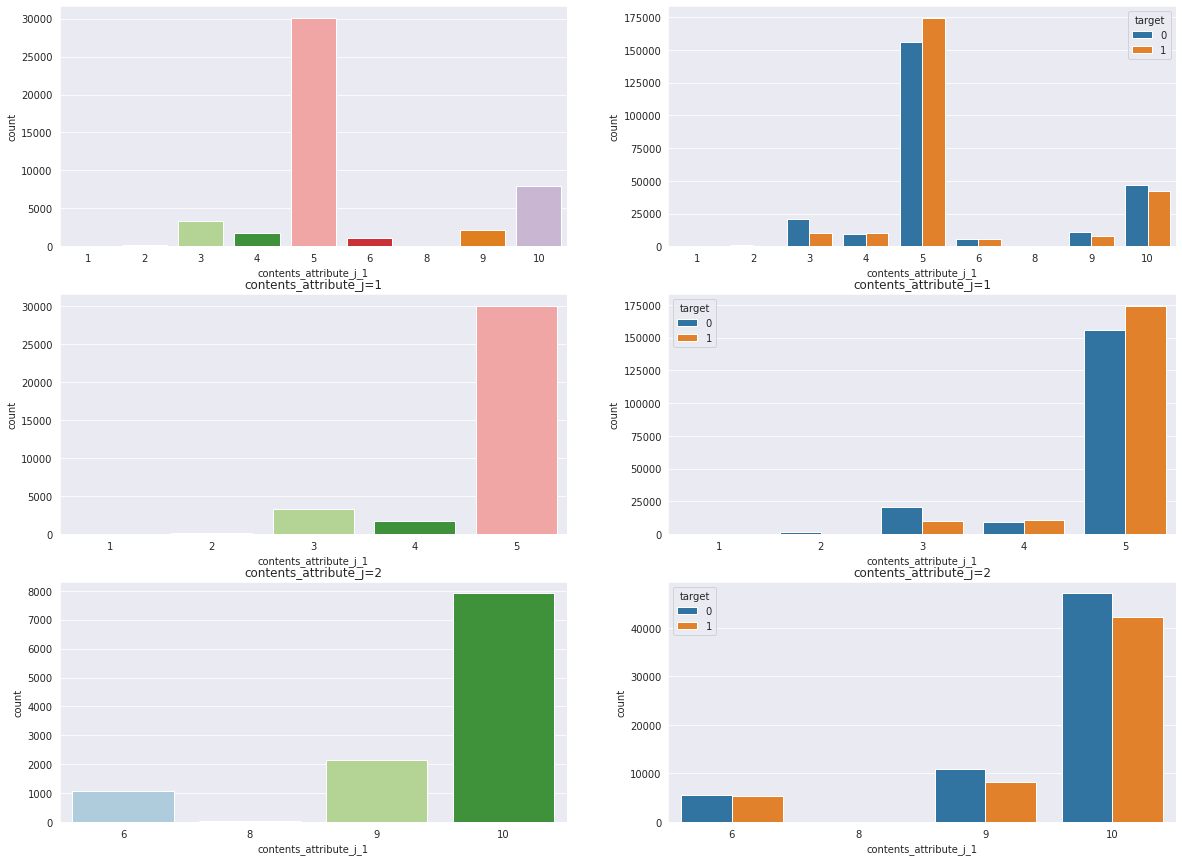

In [ ]:
n1=train.loc[train["contents_attribute_j"]==1]
n2=train.loc[train["contents_attribute_j"]==2]
e1=test.loc[test["contents_attribute_j"]==1]
e2=test.loc[test["contents_attribute_j"]==2]

figure, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.countplot(test['contents_attribute_j_1'], ax=ax1, palette="Paired")
sns.countplot(train['contents_attribute_j_1'], hue=train['target'], ax=ax2)

sns.countplot(e1['contents_attribute_j_1'], ax=ax3, palette="Paired")
sns.countplot(n1['contents_attribute_j_1'], hue=n1['target'], ax=ax4)

sns.countplot(e2['contents_attribute_j_1'], ax=ax5, palette="Paired")
sns.countplot(n2['contents_attribute_j_1'], hue=n2['target'], ax=ax6)


sns.set_style("darkgrid")
ax3.set(title='contents_attribute_j=1')
ax4.set(title='contents_attribute_j=1')
ax5.set(title='contents_attribute_j=2')
ax6.set(title='contents_attribute_j=2')

- contents_attribute_j의 경우, test와 train_0과 양상이 비슷함 (3, 4)

사용자 번호
--

In [ ]:
te_prn=(len(test["person_rn"].unique()))/(len(test.index))
t0_prn=(len(train_0["person_rn"].unique()))/(len(train_0.index))
t1_prn=(len(train_1["person_rn"].unique()))/(len(train_1.index))

print(f"test unique/index: {te_prn}")
print(f"train_0 unique/index: {t0_prn}")
print(f"train_1 unique/index: {t1_prn}")

test unique/index: 0.7442030859408671
train_0 unique/index: 0.6863436158435083
train_1 unique/index: 0.7235464131236421


[Text(0.5, 1.0, 'train_1')]

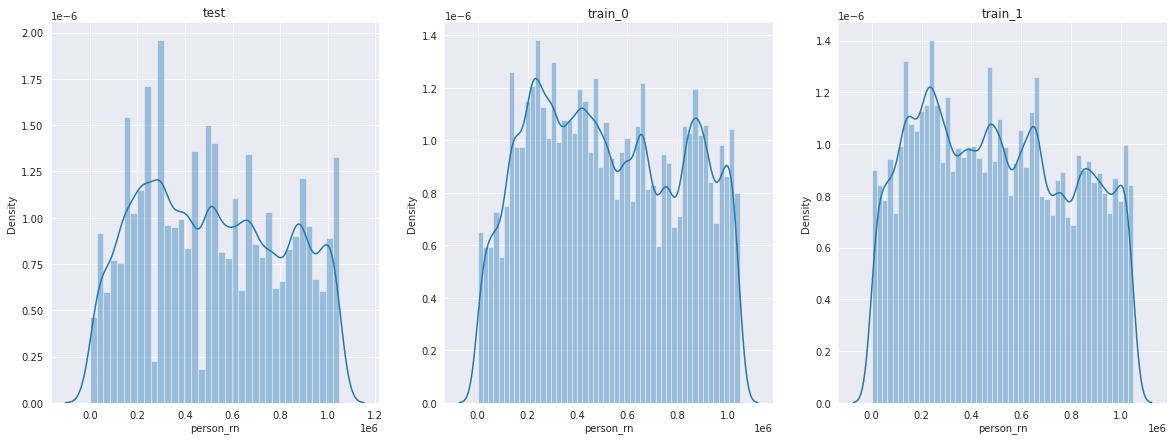

In [ ]:
figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(20,7)

sns.distplot(test["person_rn"], ax=ax1)
sns.distplot(train_0["person_rn"], ax=ax2)
sns.distplot(train_1["person_rn"], ax=ax3)

ax1.set(title="test")
ax2.set(title='train_0')
ax3.set(title='train_1')

컨텐츠 번호
--

In [ ]:
te_crn=(len(test["contents_rn"].unique()))/(len(test.index))
t0_crn=(len(train_0["contents_rn"].unique()))/(len(train_0.index))
t1_crn=(len(train_1["contents_rn"].unique()))/(len(train_1.index))

print(f"test unique/index: {te_crn}")
print(f"train_0 unique/index: {t0_crn}")
print(f"train_1 unique/index: {t1_crn}")

test unique/index: 0.6785837427807948
train_0 unique/index: 0.7507387318502943
train_1 unique/index: 0.6190157268432698


[Text(0.5, 1.0, 'train_1')]

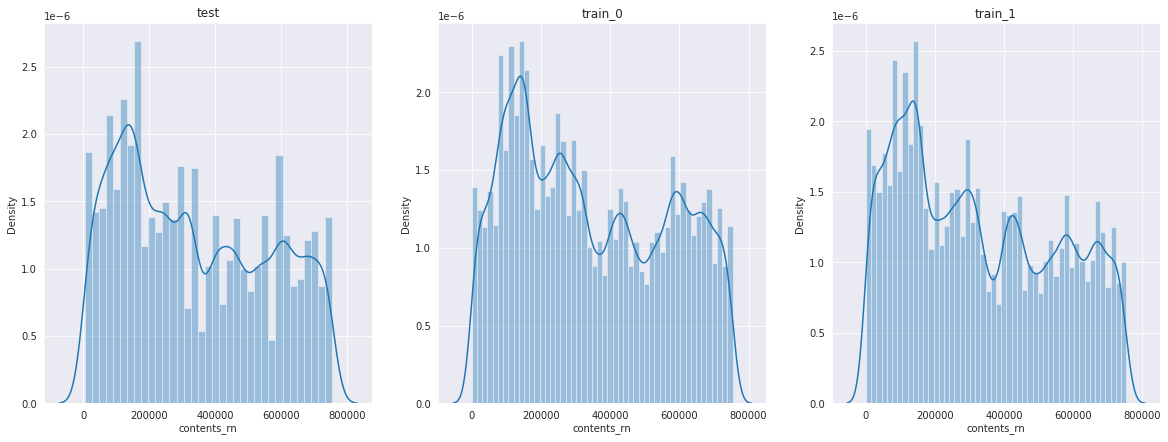

In [ ]:
figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(20,7)

sns.distplot(test["contents_rn"], ax=ax1)
sns.distplot(train_0["contents_rn"], ax=ax2)
sns.distplot(train_1["contents_rn"], ax=ax3)

ax1.set(title="test")
ax2.set(title='train_0')
ax3.set(title='train_1')

컨텐츠 열람 일시
--

In [ ]:
from pandas.api.types import CategoricalDtype

cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

cat_type=CategoricalDtype(categories=cats, ordered=True)

train['day']=train['day'].astype(cat_type)
test['day']=test['day'].astype(cat_type)

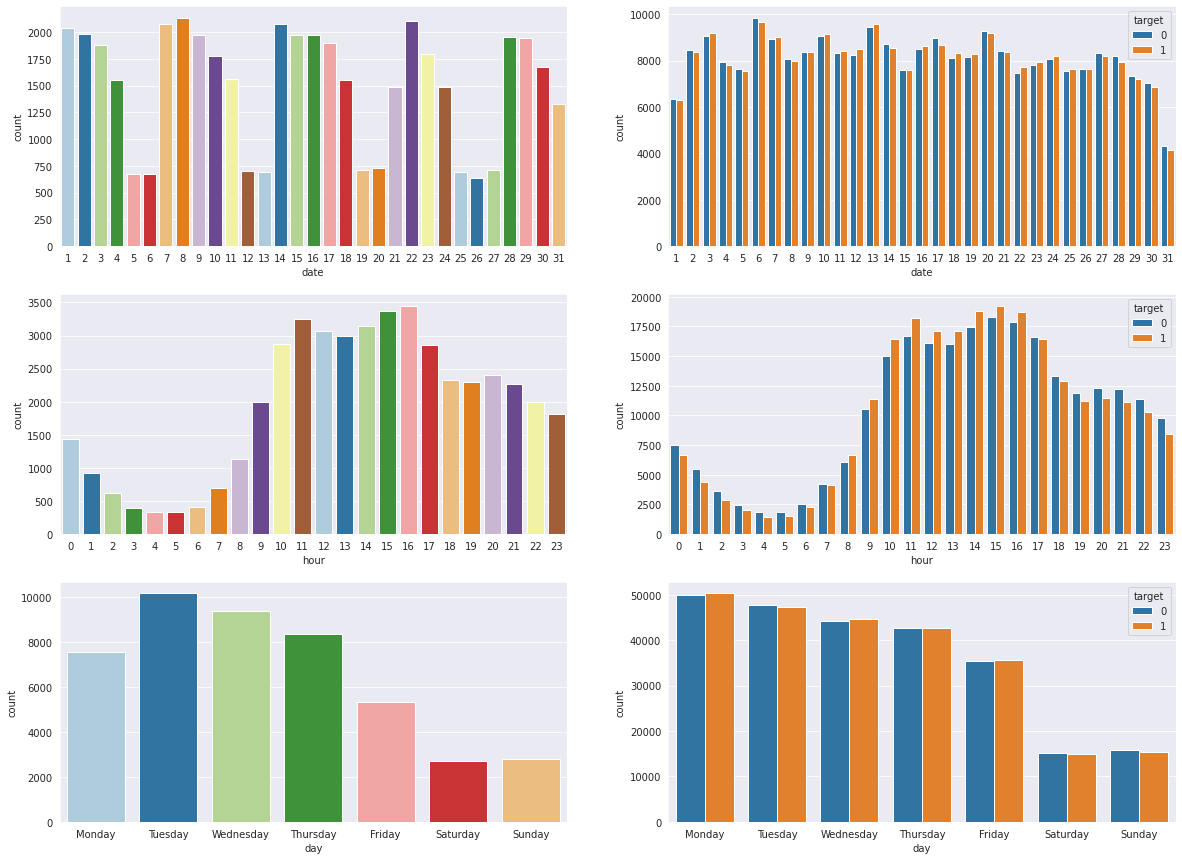

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.countplot(test["date"], ax=ax1, palette="Paired")
sns.countplot(train["date"], hue=train['target'], ax=ax2)
sns.countplot(test["hour"], ax=ax3, palette="Paired")
sns.countplot(train["hour"], hue=train['target'], ax=ax4)
sns.countplot(test["day"], ax=ax5, palette="Paired")
sns.countplot(train["day"], hue=train['target'], ax=ax6)

- date 가 test랑 train이랑 차이가 많이 남.

- day 역시 test랑 train이랑 차이가 많이 남.

새로 결합한 칼럼들
--

In [ ]:
for i in range(35,59):
  name=train.columns[i]
  cnt=len(set(train[name]))
  print(f"{i}.{name}: {cnt}")

35.person_prefer_d_1_n: 443
36.person_prefer_d_1_s: 137
37.person_prefer_d_1_m: 36
38.person_prefer_d_1_l: 11
39.person_prefer_d_2_n: 435
40.person_prefer_d_2_s: 137
41.person_prefer_d_2_m: 36
42.person_prefer_d_2_l: 11
43.person_prefer_d_3_n: 420
44.person_prefer_d_3_s: 136
45.person_prefer_d_3_m: 36
46.person_prefer_d_3_l: 11
47.contents_attribute_d_n: 431
48.contents_attribute_d_s: 137
49.contents_attribute_d_m: 36
50.contents_attribute_d_l: 11
51.person_prefer_h_1_l: 19
52.person_prefer_h_1_m: 246
53.person_prefer_h_2_l: 19
54.person_prefer_h_2_m: 246
55.person_prefer_h_3_l: 19
56.person_prefer_h_3_m: 246
57.contents_attribute_h_l: 17
58.contents_attribute_h_m: 228


countplot: 37,40,41,45,49,50,52,54,56

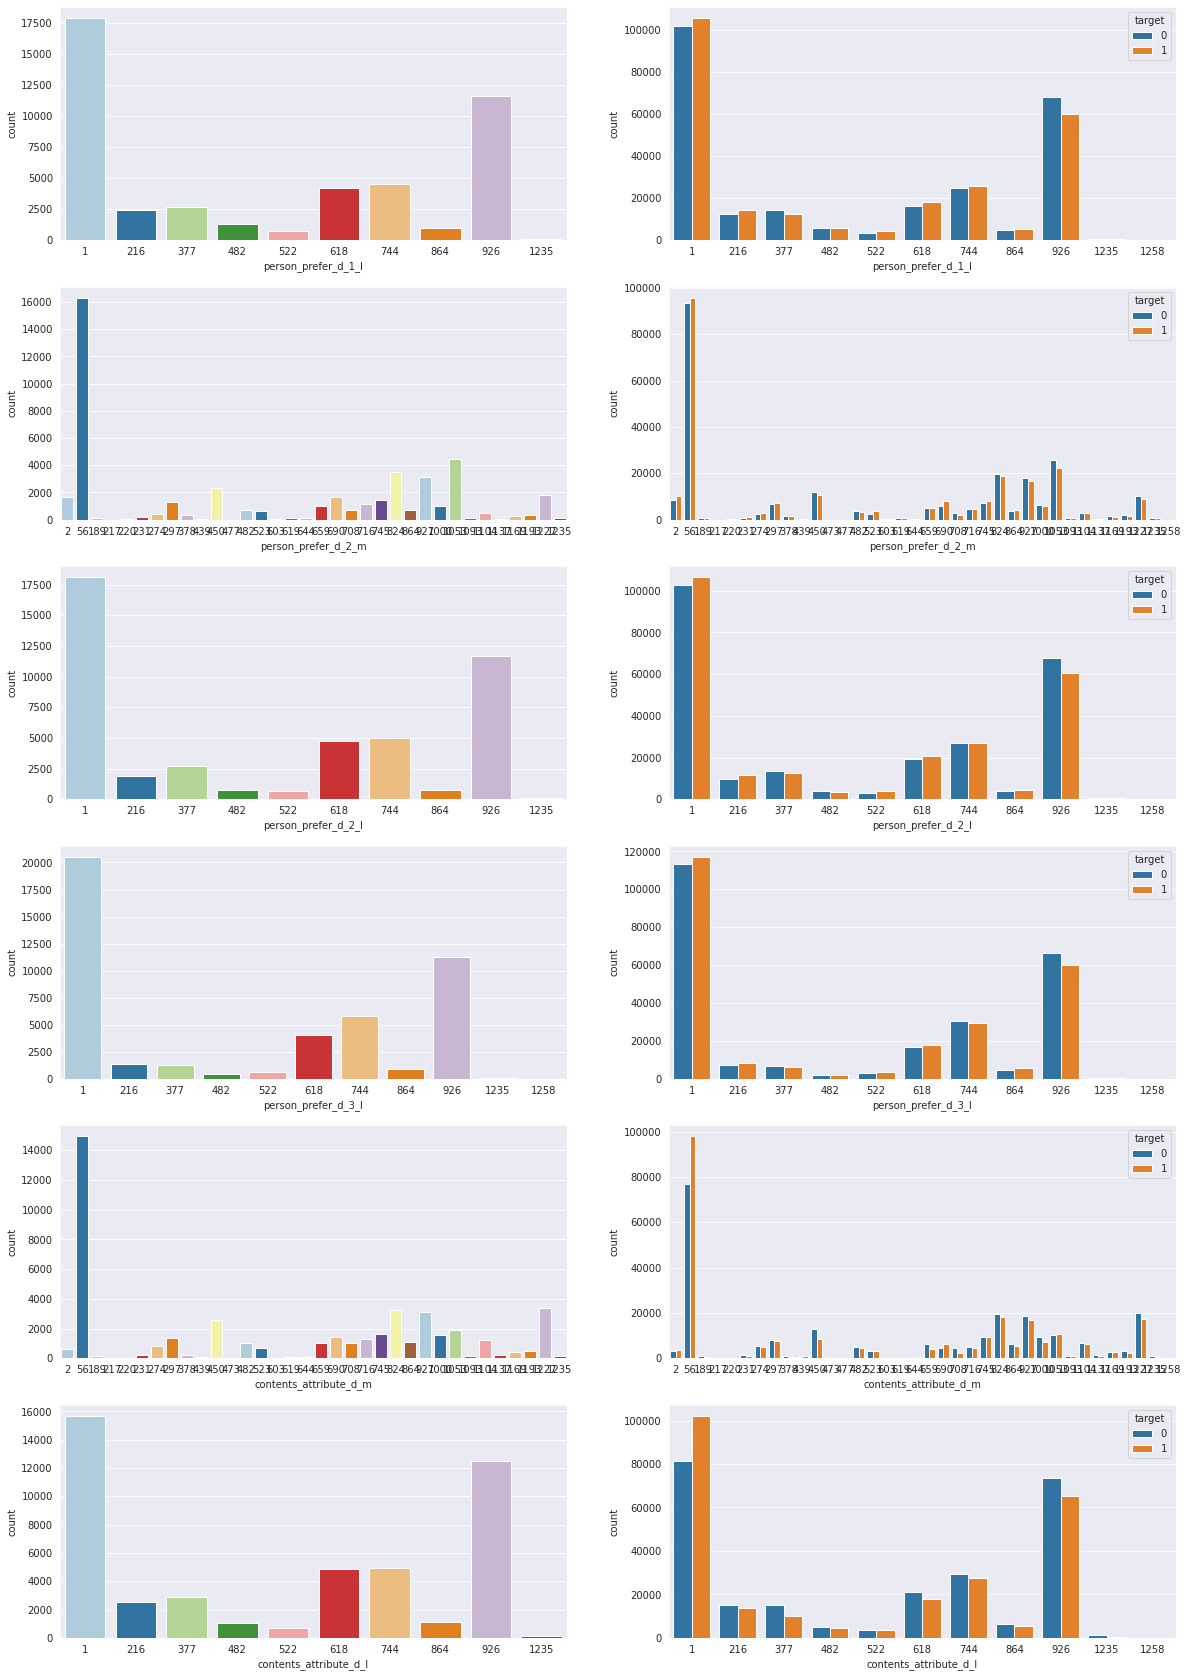

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) =plt.subplots(nrows=6,ncols=2)
figure.set_size_inches(20,30)

sns.countplot(test["person_prefer_d_1_l"], ax=ax1, palette="Paired")
sns.countplot(train["person_prefer_d_1_l"], hue=train['target'], ax=ax2)
sns.countplot(test["person_prefer_d_2_m"], ax=ax3, palette="Paired")
sns.countplot(train["person_prefer_d_2_m"], hue=train['target'], ax=ax4)
sns.countplot(test["person_prefer_d_2_l"], ax=ax5, palette="Paired")
sns.countplot(train["person_prefer_d_2_l"], hue=train['target'], ax=ax6)
sns.countplot(test["person_prefer_d_3_l"], ax=ax7, palette="Paired")
sns.countplot(train["person_prefer_d_3_l"], hue=train['target'], ax=ax8)
sns.countplot(test["contents_attribute_d_m"], ax=ax9, palette="Paired")
sns.countplot(train["contents_attribute_d_m"], hue=train['target'], ax=ax10)
sns.countplot(test["contents_attribute_d_l"], ax=ax11, palette="Paired")
sns.countplot(train["contents_attribute_d_l"], hue=train['target'], ax=ax12)

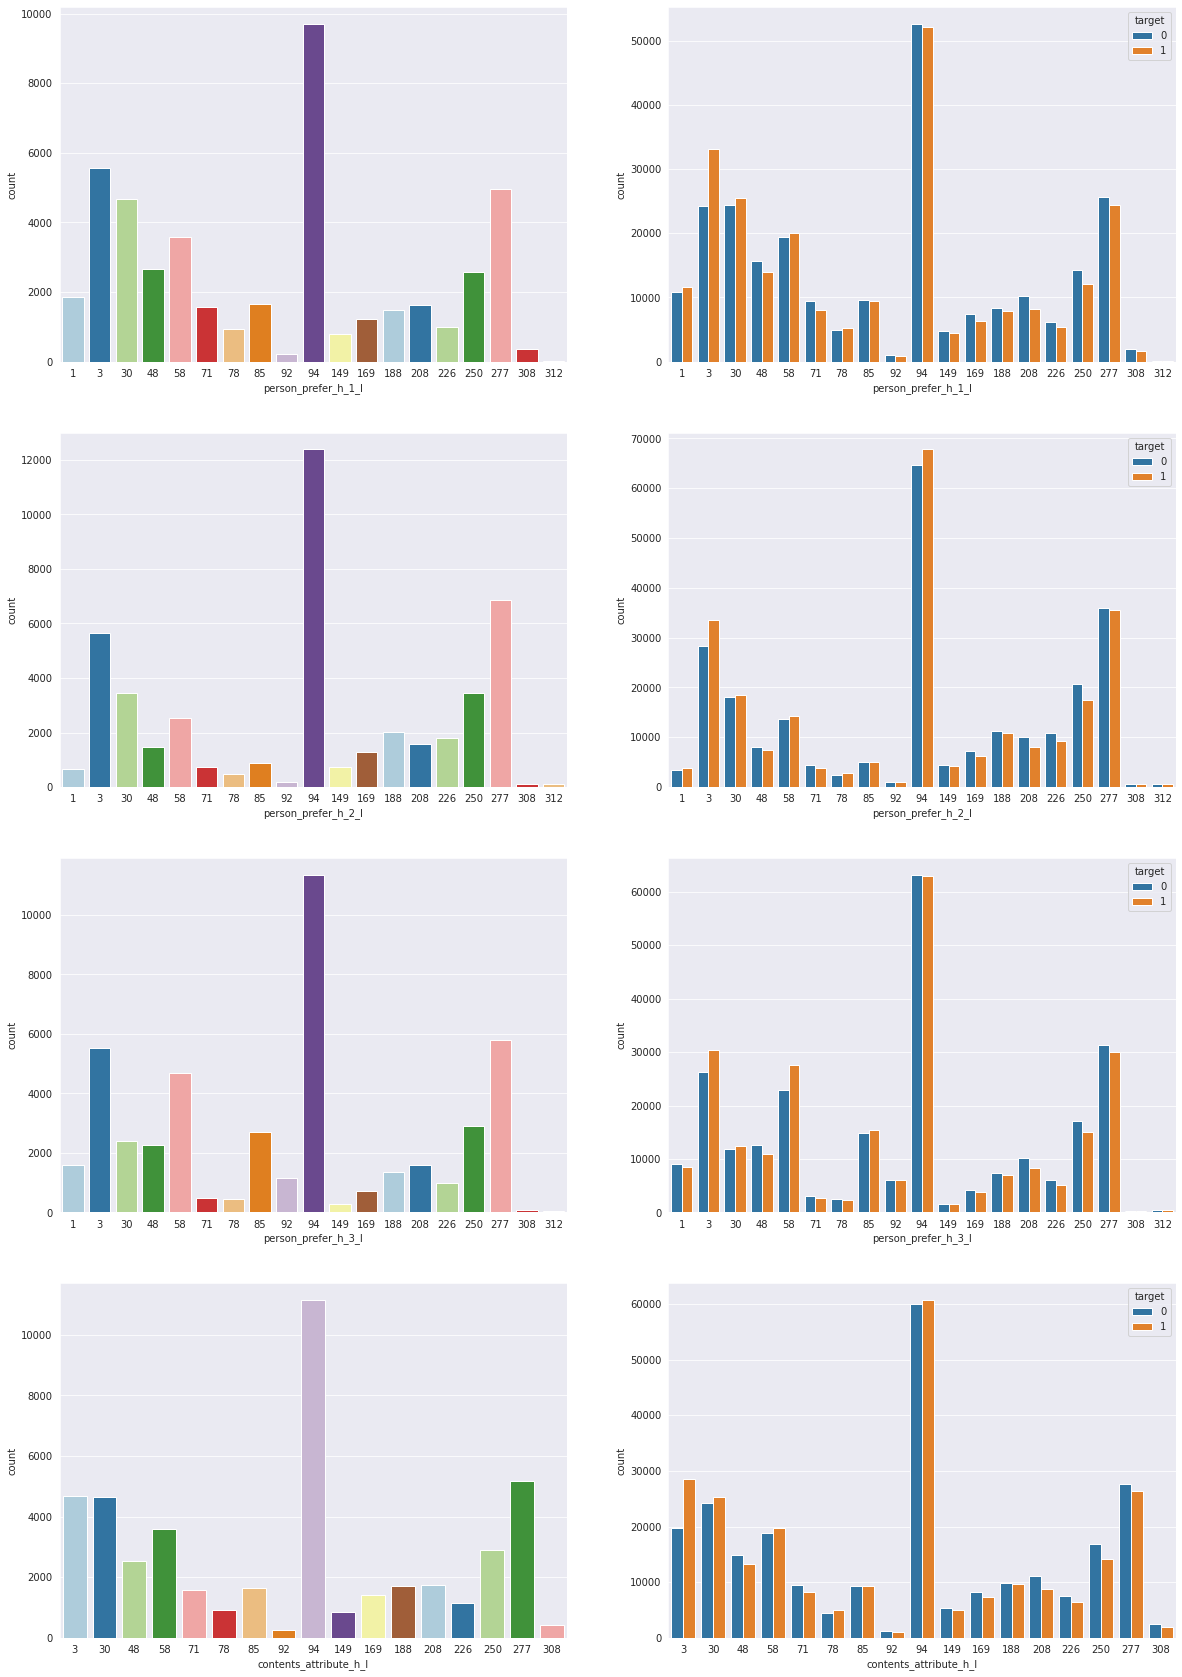

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) =plt.subplots(nrows=4,ncols=2)
figure.set_size_inches(20,30)

sns.countplot(test["person_prefer_h_1_l"], ax=ax1, palette="Paired")
sns.countplot(train["person_prefer_h_1_l"], hue=train['target'], ax=ax2)
sns.countplot(test["person_prefer_h_2_l"], ax=ax3, palette="Paired")
sns.countplot(train["person_prefer_h_2_l"], hue=train['target'], ax=ax4)
sns.countplot(test["person_prefer_h_3_l"], ax=ax5, palette="Paired")
sns.countplot(train["person_prefer_h_3_l"], hue=train['target'], ax=ax6)
sns.countplot(test["contents_attribute_h_l"], ax=ax7, palette="Paired")
sns.countplot(train["contents_attribute_h_l"], hue=train['target'], ax=ax8)

In [ ]:
def show_graph(col):
  figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=1,ncols=3)
  figure.set_size_inches(20,5)
  sns.distplot(test[col], ax=ax1)
  sns.distplot(train_0[col], ax=ax2)
  sns.distplot(train_1[col], ax=ax3)
  ax1.set(title="test")
  ax2.set(title='train_0')
  ax3.set(title='train_1')
  plt.show()

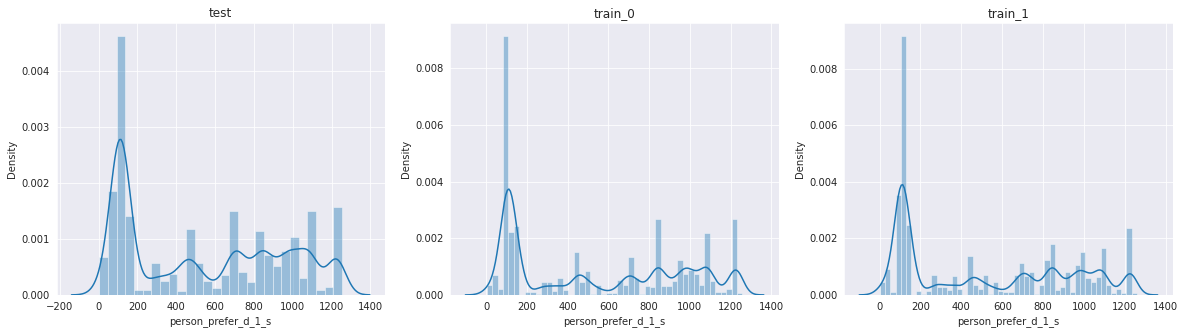

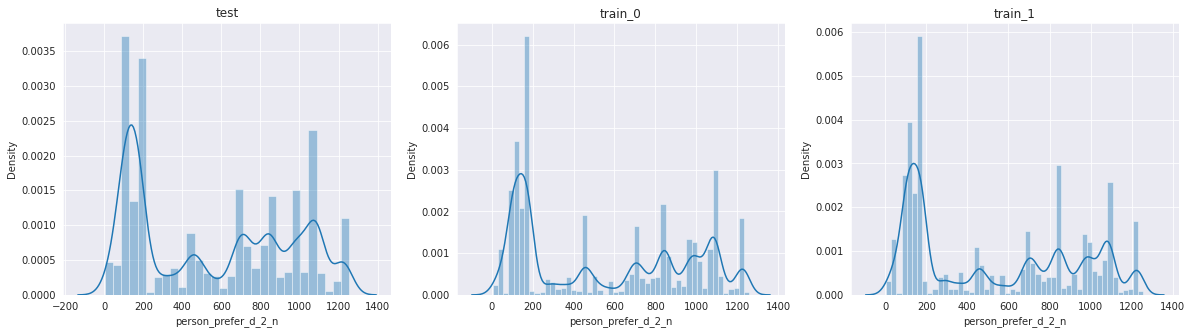

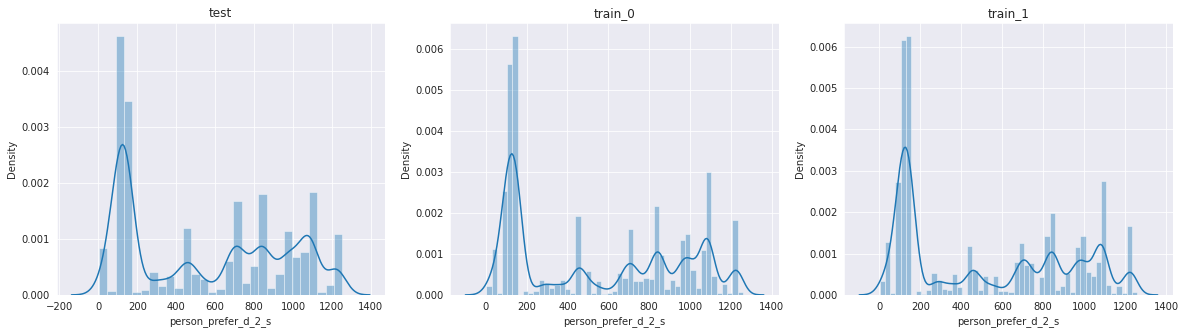

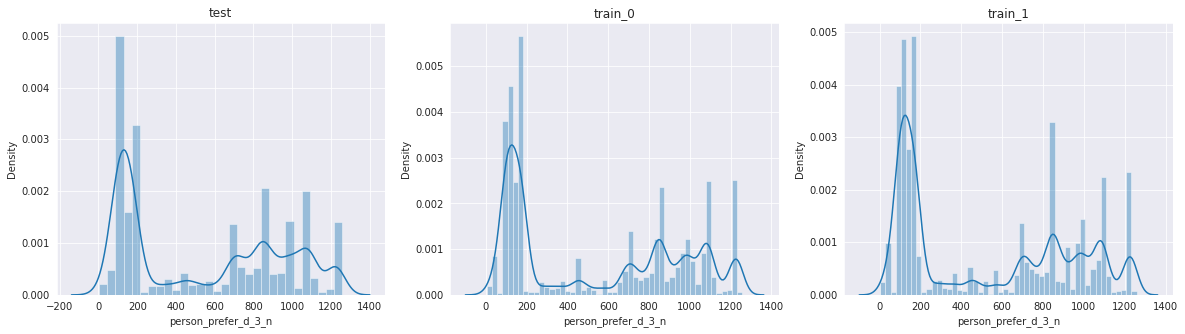

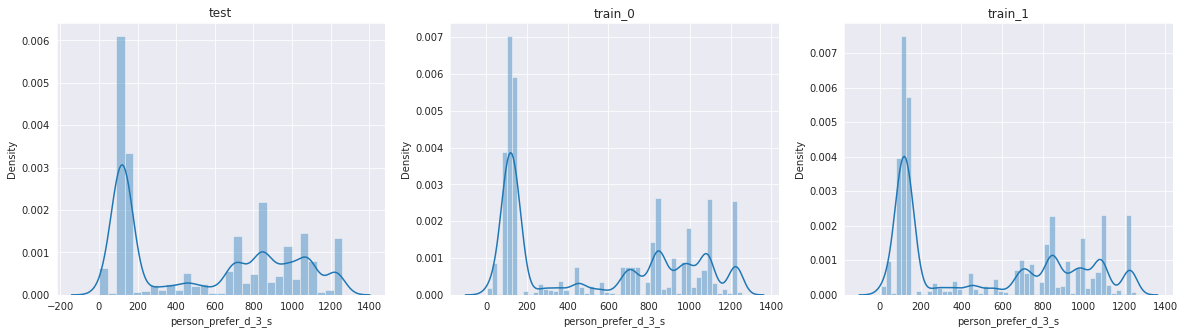

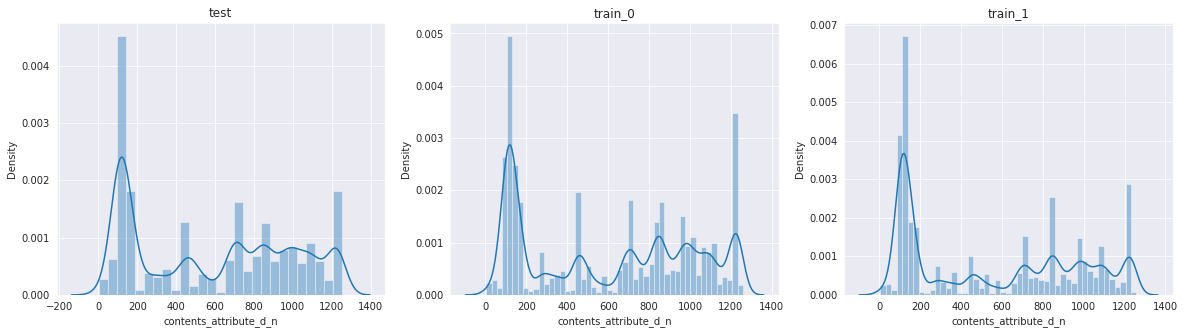

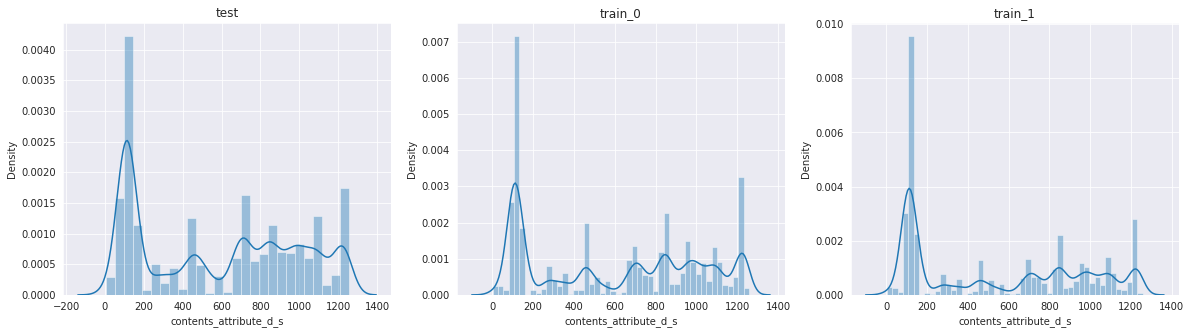

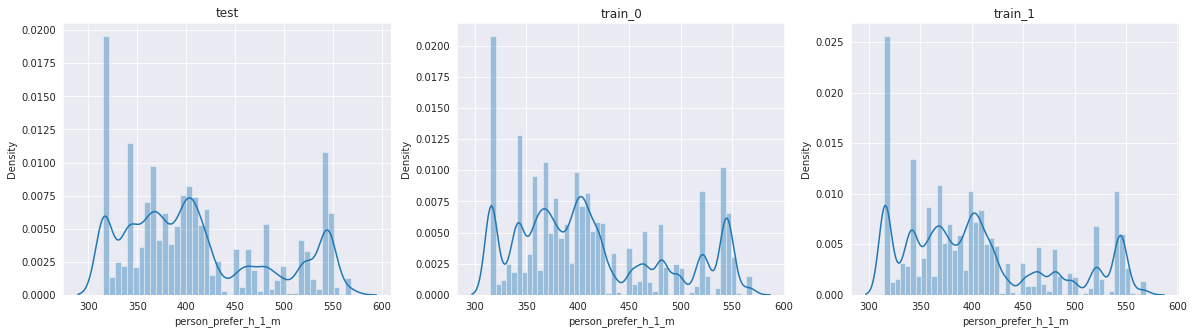

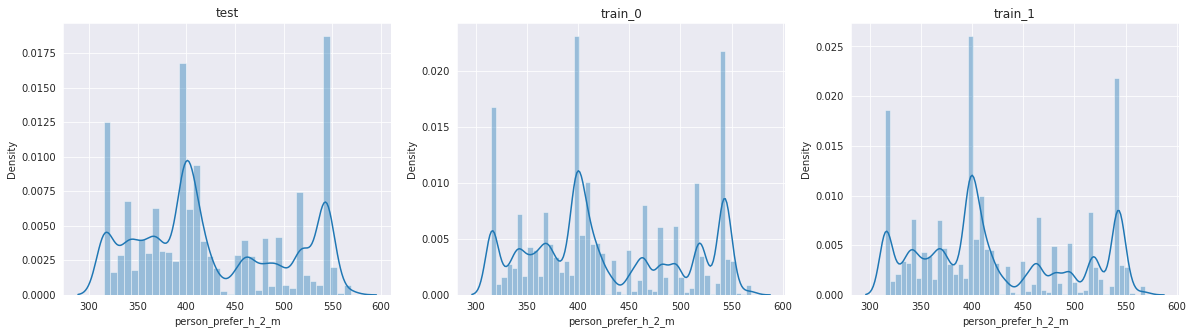

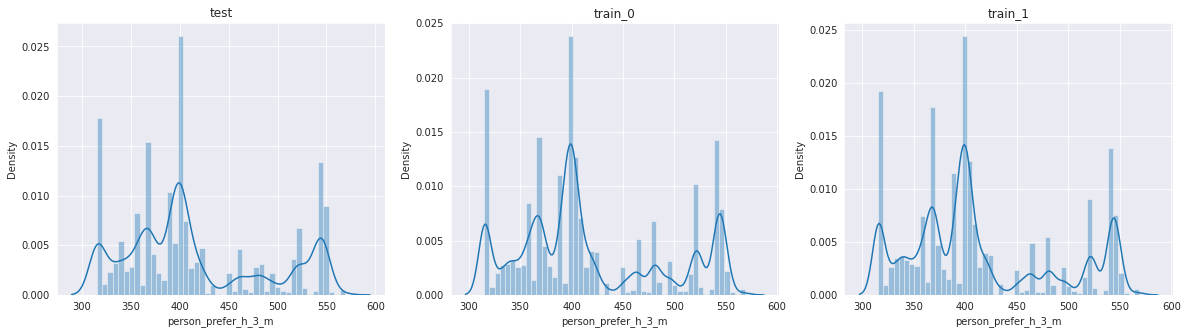

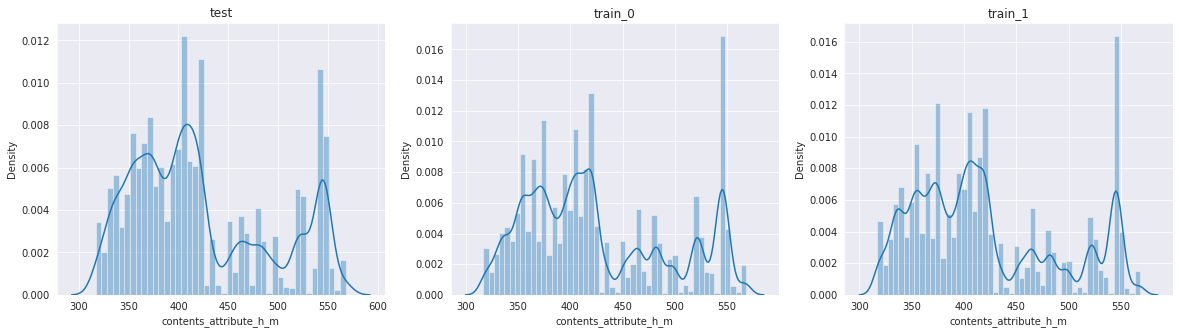

In [ ]:
col_list=["person_prefer_d_1_s","person_prefer_d_2_n","person_prefer_d_2_s","person_prefer_d_3_n",
          "person_prefer_d_3_s","contents_attribute_d_n","contents_attribute_d_s","person_prefer_h_1_m",
          "person_prefer_h_2_m","person_prefer_h_3_m","contents_attribute_h_m"]

for col in col_list:
  show_graph(col)

# FINAL EDA (Statistics) Train vs Test

In [9]:
for i in range(1,7):
    name=train.columns[i]
    train[name]=train[name].apply(lambda x:1 if x==True else 2)
    
for i in range(1,7):
    name=test.columns[i]
    test[name]=test[name].apply(lambda x:1 if x==True else 2)

In [10]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train["day"]=le.fit_transform(train['day'])
test["day"]=le.fit_transform(test['day'])

In [11]:
train.drop(['person_prefer_f','person_prefer_g'], axis=1, inplace=True)
test.drop(['person_prefer_f','person_prefer_g'], axis=1, inplace=True)

Train에서 test 개수만큼 sample 추출 (random 추출)

In [19]:
len(train.index)

501951

In [20]:
len(test.index)

46404

In [21]:
from sklearn.model_selection import train_test_split
train_, train_sample=train_test_split(train, test_size=0.1, random_state=42)

In [22]:
train_sample=train_sample.reset_index()
train_sample=train_sample.iloc[:46404, :]
train_sample.drop('index', axis=1, inplace=True)

In [23]:
len(train_sample.index)

46404

In [24]:
sample_0=train_sample.loc[train_sample['target']==0]
sample_1=train_sample.loc[train_sample['target']==1]

In [25]:
train_sample.drop('target', axis=1, inplace=True)
sample_0.drop('target', axis=1, inplace=True)
sample_1.drop('target', axis=1, inplace=True)

p-value 기준 0.05
--

```
귀무가설: 두 개의 데이터프레임 칼럼 값의 평균은 서로 같다.

대립가설: 두 개의 데이터프레임 칼럼 값의 평균은 서로 다르다.
```

**칼럼별로 비교 진행**


Train_sample vs Test_sample

In [26]:
train_sample=train_sample.reset_index()
sample_0=sample_0.reset_index()
sample_1=sample_1.reset_index()

train_sample.drop('index', axis=1, inplace=True)
sample_0.drop('index', axis=1, inplace=True)
sample_1.drop('index', axis=1, inplace=True)

In [27]:
import scipy
same_tnte=pd.DataFrame(columns=['name','p-value'])
diff_tnte=pd.DataFrame(columns=['name','p-value'])

for i in range(1,len(train_sample.columns)):
  col=train_sample.columns[i]
  t_result=scipy.stats.ttest_rel(train_sample.iloc[:, i], test.iloc[:, i])
  if t_result[1]<0.05:
    diff_tnte=diff_tnte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)
  else:
    same_tnte=same_tnte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)

**귀무가설 채택(train vs test)**

In [28]:
same_tnte.sort_values('p-value', ascending=False).head()

,name,p-value
23,hour,0.906851
11,contents_attribute_e,0.813888
14,contents_rn,0.785839
2,d_s_match_yn,0.476336
0,d_l_match_yn,0.402552


In [29]:
same_tnte.name.values

array(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn',
       'person_attribute_b', 'person_prefer_e', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_j_1',
       'contents_attribute_j', 'contents_attribute_k',
       'contents_attribute_d', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn',
       'contents_attribute_d_n', 'contents_attribute_d_s',
       'person_prefer_h_2_l', 'person_prefer_h_2_m',
       'person_prefer_h_3_l', 'person_prefer_h_3_m',
       'contents_attribute_h_l', 'contents_attribute_h_m', 'hour'],
      dtype=object)

**대립가설 채택(train vs test)**

In [30]:
diff_tnte.sort_values('p-value', ascending=True).head()

,name,p-value
32,day,2.970254e-93
12,contents_attribute_c,5.246595e-61
13,contents_attribute_l,7.583327e-37
14,contents_attribute_m,8.617135e-08
3,person_attribute_a,3.906906e-07


In [31]:
diff_tnte.name.values

array(['h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn',
       'person_attribute_a', 'person_attribute_a_1', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_h_1', 'contents_attribute_i',
       'contents_attribute_a', 'contents_attribute_c',
       'contents_attribute_l', 'contents_attribute_m',
       'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s',
       'person_prefer_d_3_m', 'person_prefer_d_3_l',
       'contents_attribute_d_m', 'contents_attribute_d_l',
       'person_prefer_h_1_l', 'person_prefer_h_1_m', 'date', 'day'],
      dtype=object)

In [32]:
set_same_tnte=set(same_tnte['name'])
set_diff_tnte=set(diff_tnte['name'])

**Train_0 vs Test**

In [33]:
len(sample_0.index)

23292

In [34]:
len(test.index)

46404

In [35]:
test_, test_sample=train_test_split(test, test_size=0.6, random_state=42)

In [36]:
test_sample=test_sample.reset_index()
test_sample.drop('index', axis=1, inplace=True)

In [37]:
test_sample_0=test_sample.iloc[:23292]

In [38]:
len(test_sample_0.index)

23292

In [39]:
same_tzte=pd.DataFrame(columns=['name','p-value'])
diff_tzte=pd.DataFrame(columns=['name','p-value'])

for i in range(1,len(sample_0.columns)):
  col=sample_0.columns[i]
  t_result=scipy.stats.ttest_rel(sample_0.iloc[:, i], test_sample_0.iloc[:, i])
  if t_result[1]<0.05:
    diff_tzte=diff_tzte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)
  else:
    same_tzte=same_tzte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)

**귀무가설 채택(train_0 vs test)**


In [40]:
same_tzte.sort_values('p-value', ascending=False).head()

,name,p-value
19,person_prefer_d_3_m,0.899134
5,person_prefer_d_3,0.812105
18,person_prefer_d_3_s,0.800647
17,person_prefer_d_3_n,0.799140
20,person_prefer_d_3_l,0.658763


In [41]:
same_tzte.name.values

array(['h_s_match_yn', 'person_attribute_a_1', 'person_attribute_b',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'contents_attribute_i', 'contents_attribute_j_1', 'person_rn',
       'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s',
       'person_prefer_d_3_m', 'person_prefer_d_3_l', 'hour'], dtype=object)

**대립가설 채택(train_0 vs test)**

In [42]:
diff_tzte.sort_values('p-value', ascending=True).head()

,name,p-value
0,d_l_match_yn,7.489850e-48
34,day,6.997864e-42
1,d_m_match_yn,1.918293e-39
2,d_s_match_yn,4.348668e-26
16,contents_attribute_d,5.053214e-11


In [44]:
diff_tzte.name.values

array(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'person_attribute_a', 'person_prefer_c',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_a',
       'contents_attribute_j', 'contents_attribute_c',
       'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m',
       'contents_attribute_e', 'contents_attribute_h', 'contents_rn',
       'contents_attribute_d_n', 'contents_attribute_d_s',
       'contents_attribute_d_m', 'contents_attribute_d_l',
       'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m',
       'person_prefer_h_3_l', 'person_prefer_h_3_m',
       'contents_attribute_h_l', 'contents_attribute_h_m', 'date', 'day'],
      dtype=object)

In [43]:
set_same_tzte=set(same_tzte['name'])
set_diff_tzte=set(diff_tzte['name'])

**Train_1 vs Test**

In [45]:
len(sample_1.index)

23112

In [46]:
test_sample_1=test_sample.iloc[:23112]

In [47]:
same_tote=pd.DataFrame(columns=['name','p-value'])
diff_tote=pd.DataFrame(columns=['name','p-value'])

for i in range(1,len(sample_0.columns)):
  col=sample_0.columns[i]
  t_result=scipy.stats.ttest_rel(sample_0.iloc[:, i], test_sample_0.iloc[:, i])
  if t_result[1]<0.05:
    diff_tote=diff_tote.append({'name':col,'p-value':t_result[1]}, ignore_index=True)
  else:
    same_tote=same_tote.append({'name':col,'p-value':t_result[1]}, ignore_index=True)

**귀무가설 채택(train_1 vs test)**

In [48]:
same_tote.sort_values('p-value', ascending=False).head()

,name,p-value
19,person_prefer_d_3_m,0.899134
5,person_prefer_d_3,0.812105
18,person_prefer_d_3_s,0.800647
17,person_prefer_d_3_n,0.799140
20,person_prefer_d_3_l,0.658763


In [49]:
same_tote.name.values

array(['h_s_match_yn', 'person_attribute_a_1', 'person_attribute_b',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'contents_attribute_i', 'contents_attribute_j_1', 'person_rn',
       'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s',
       'person_prefer_d_3_m', 'person_prefer_d_3_l', 'hour'], dtype=object)

**대립가설 채택(train_1)**

In [50]:
diff_tote.sort_values('p-value', ascending=False).head()

,name,p-value
17,contents_attribute_m,0.018815
4,h_m_match_yn,0.017760
12,contents_attribute_j,0.017704
33,date,0.014683
18,contents_attribute_e,0.002801


In [52]:
diff_tote.name.values

array(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'person_attribute_a', 'person_prefer_c',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_a',
       'contents_attribute_j', 'contents_attribute_c',
       'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m',
       'contents_attribute_e', 'contents_attribute_h', 'contents_rn',
       'contents_attribute_d_n', 'contents_attribute_d_s',
       'contents_attribute_d_m', 'contents_attribute_d_l',
       'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m',
       'person_prefer_h_3_l', 'person_prefer_h_3_m',
       'contents_attribute_h_l', 'contents_attribute_h_m', 'date', 'day'],
      dtype=object)

In [53]:
set_same_tote=set(same_tote['name'])
set_diff_tote=set(diff_tote['name'])

**(Train, Train_0, Train_1) vs test가 서로 평균이 다른 칼럼** 

In [54]:
(set_diff_tnte )&(set_diff_tzte )&(set_diff_tote )

{'contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_d_l',
 'contents_attribute_d_m',
 'contents_attribute_l',
 'contents_attribute_m',
 'date',
 'day',
 'h_l_match_yn',
 'h_m_match_yn',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_h_1',
 'person_prefer_h_1_l',
 'person_prefer_h_1_m'}

In [55]:
tnte_diff_list=(set_diff_tnte )&(set_diff_tzte )&(set_diff_tote )

In [56]:
(set_diff_tzte )-(set_diff_tote )

set()

In [57]:
(set_diff_tote )-(set_diff_tzte )

set()

In [58]:
len((set_diff_tnte )&(set_diff_tzte )&(set_diff_tote ))

15

p-value 기준 0.01
--

In [59]:
same_tnte=pd.DataFrame(columns=['name','p-value'])
diff_tnte=pd.DataFrame(columns=['name','p-value'])

for i in range(1,len(train_sample.columns)):
  col=train_sample.columns[i]
  t_result=scipy.stats.ttest_rel(train_sample.iloc[:, i], test.iloc[:, i])
  if t_result[1]<0.01:
    diff_tnte=diff_tnte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)
  else:
    same_tnte=same_tnte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)

In [60]:
same_tote=pd.DataFrame(columns=['name','p-value'])
diff_tote=pd.DataFrame(columns=['name','p-value'])

for i in range(1,len(sample_0.columns)):
  col=sample_0.columns[i]
  t_result=scipy.stats.ttest_rel(sample_0.iloc[:, i], test_sample_0.iloc[:, i])
  if t_result[1]<0.01:
    diff_tote=diff_tote.append({'name':col,'p-value':t_result[1]}, ignore_index=True)
  else:
    same_tote=same_tote.append({'name':col,'p-value':t_result[1]}, ignore_index=True)

In [61]:
same_tzte=pd.DataFrame(columns=['name','p-value'])
diff_tzte=pd.DataFrame(columns=['name','p-value'])

for i in range(1,len(sample_0.columns)):
  col=sample_0.columns[i]
  t_result=scipy.stats.ttest_rel(sample_0.iloc[:, i], test_sample_0.iloc[:, i])
  if t_result[1]<0.01:
    diff_tzte=diff_tzte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)
  else:
    same_tzte=same_tzte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)

In [62]:
set_same_tote=set(same_tote['name'])
set_diff_tote=set(diff_tote['name'])
set_same_tzte=set(same_tzte['name'])
set_diff_tzte=set(diff_tzte['name'])
set_same_tnte=set(same_tnte['name'])
set_diff_tnte=set(diff_tnte['name'])

**귀무가설 채택(train vs test)**

In [63]:
same_tnte.sort_values('p-value', ascending=False).head()

,name,p-value
33,hour,0.906851
14,contents_attribute_e,0.813888
17,contents_rn,0.785839
2,d_s_match_yn,0.476336
0,d_l_match_yn,0.402552


In [64]:
same_tnte.name.values

array(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_s_match_yn',
       'person_attribute_b', 'person_prefer_d_3', 'person_prefer_e',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_k', 'contents_attribute_d',
       'contents_attribute_e', 'contents_attribute_h', 'person_rn',
       'contents_rn', 'person_prefer_d_3_n', 'person_prefer_d_3_s',
       'person_prefer_d_3_m', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l',
       'person_prefer_h_1_m', 'person_prefer_h_2_l',
       'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'hour'], dtype=object)

**대립가설 채택(train vs test)**

In [65]:
diff_tnte.sort_values('p-value', ascending=False).head()

,name,p-value
20,person_prefer_d_3_l,0.009308
7,contents_attribute_i,0.000974
3,person_attribute_a_1,0.000581
1,h_m_match_yn,0.000087
5,person_prefer_d_1,0.000049


In [66]:
diff_tnte.name.values

array(['h_l_match_yn', 'h_m_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_prefer_c', 'person_prefer_d_1',
       'person_prefer_d_2', 'contents_attribute_i',
       'contents_attribute_a', 'contents_attribute_c',
       'contents_attribute_l', 'contents_attribute_m',
       'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_l', 'date', 'day'], dtype=object)

**귀무가설 채택(train_0 vs test)**

In [67]:
same_tzte.sort_values('p-value', ascending=False).head()

,name,p-value
22,person_prefer_d_3_m,0.899134
6,person_prefer_d_3,0.812105
21,person_prefer_d_3_s,0.800647
20,person_prefer_d_3_n,0.799140
23,person_prefer_d_3_l,0.658763


In [69]:
same_tzte.name.values

array(['h_m_match_yn', 'h_s_match_yn', 'person_attribute_a_1',
       'person_attribute_b', 'person_prefer_d_1', 'person_prefer_d_2',
       'person_prefer_d_3', 'contents_attribute_i',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_m', 'person_rn', 'person_prefer_d_1_n',
       'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m',
       'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'date', 'hour'], dtype=object)

**대립가설 채택(train_0 vs test)**

In [70]:
diff_tzte.sort_values('p-value', ascending=False).head()

,name,p-value
15,contents_attribute_e,0.002801
10,contents_attribute_a,0.000910
4,person_attribute_a,0.000831
22,person_prefer_h_1_l,0.000543
23,person_prefer_h_1_m,0.000426


In [71]:
diff_tzte.name.values

array(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'person_attribute_a', 'person_prefer_c', 'person_prefer_e',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_a', 'contents_attribute_c',
       'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_e',
       'contents_attribute_h', 'contents_rn', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l',
       'person_prefer_h_1_m', 'person_prefer_h_2_l',
       'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'day'], dtype=object)

**귀무가설 채택(train_1 vs test)**

In [72]:
same_tote.sort_values('p-value', ascending=False).head()

,name,p-value
22,person_prefer_d_3_m,0.899134
6,person_prefer_d_3,0.812105
21,person_prefer_d_3_s,0.800647
20,person_prefer_d_3_n,0.799140
23,person_prefer_d_3_l,0.658763


In [73]:
same_tote.name.values

array(['h_m_match_yn', 'h_s_match_yn', 'person_attribute_a_1',
       'person_attribute_b', 'person_prefer_d_1', 'person_prefer_d_2',
       'person_prefer_d_3', 'contents_attribute_i',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_m', 'person_rn', 'person_prefer_d_1_n',
       'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m',
       'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'date', 'hour'], dtype=object)

**대립가설 채택(train_1 vs test)**

In [74]:
diff_tote.sort_values('p-value', ascending=False).head()

,name,p-value
15,contents_attribute_e,0.002801
10,contents_attribute_a,0.000910
4,person_attribute_a,0.000831
22,person_prefer_h_1_l,0.000543
23,person_prefer_h_1_m,0.000426


In [76]:
diff_tote.name.values

array(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'person_attribute_a', 'person_prefer_c', 'person_prefer_e',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_a', 'contents_attribute_c',
       'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_e',
       'contents_attribute_h', 'contents_rn', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l',
       'person_prefer_h_1_m', 'person_prefer_h_2_l',
       'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'day'], dtype=object)

**(Train, Train_0, Train_1) vs test가 서로 평균이 다른 칼럼** 

In [77]:
(set_diff_tnte )&(set_diff_tzte )&(set_diff_tote )

{'contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_l',
 'day',
 'h_l_match_yn',
 'person_attribute_a',
 'person_prefer_c'}

In [78]:
tnte_diff_list_1=(set_diff_tnte )&(set_diff_tzte )&(set_diff_tote )

In [79]:
(set_diff_tzte )-(set_diff_tote )

set()

In [80]:
(set_diff_tote )-(set_diff_tzte )

set()

In [81]:
len((set_diff_tnte )&(set_diff_tzte )&(set_diff_tote ))

7

# StatsModel로 비교해보기 (Train vs Test)

In [61]:
tnte_diff_list=list(tnte_diff_list)
tnte_diff_list_1=list(tnte_diff_list_1)

In [62]:
import statsmodels.api as sm

모든 변수
--

In [63]:
x=train.drop('target', axis=1)
y=train['target']

In [64]:
x_constant=sm.add_constant(x)

model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1634.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:25:41   Log-Likelihood:            -3.2091e+05
No. Observations:              501951   AIC:                         6.419e+05
Df Residuals:                  501892   BIC:                         6.426e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.5146      0.117     12.995      0.000       1.286       1.743
id                      1.173e-06   4.51e-09    260.051      0.000    1.16e-06    1.18e-06
d_l_match_yn              -0.0828      0.002    -52.765      0.000      -0.086      -0.080
d_m_match_yn              -0.0632      0.002    -28.221      0.000      -0.068      -0.059
d_s_match_yn              -0.0257      0.003     -9.993      0.000      -0.031      -0.021
h_l_match_yn              -0.0340      0.002    -17.602      0.000      -0.038      -0.030
h_m_match_yn              -0.0298      0.003    -11.347      0.000      -0.035      -0.025
h_s_match_yn              -0.0071      0.003     -2.723      0.006      -0.012      -0.002
person_attribute_a         0.0122      0.002      6.617      0.000       0.009       0.016
person_attribute_a_1       0.0026      0.000      6.839      0.000       0.002       0.003
person_attribute_b        -0.0068      0.001     -8.402      0.000      -0.008      -0.005
person_prefer_c            0.0062      0.000     17.123      0.000       0.005       0.007
person_prefer_d_1         -0.0022      0.000     -7.184      0.000      -0.003      -0.002
person_prefer_d_2         -0.0018      0.000     -5.749      0.000      -0.002      -0.001
person_prefer_d_3          0.0016      0.000      4.755      0.000       0.001       0.002
person_prefer_e            0.0061      0.000     16.254      0.000       0.005       0.007
person_prefer_h_1          0.0004      0.000      1.916      0.055    -8.4e-06       0.001
person_prefer_h_2         -0.0004      0.000     -2.767      0.006      -0.001      -0.000
person_prefer_h_3          0.0002      0.000      1.155      0.248      -0.000       0.000
contents_attribute_i       0.0038      0.001      4.940      0.000       0.002       0.005
contents_attribute_a       0.0160      0.001     20.178      0.000       0.014       0.018
contents_attribute_j_1     0.0305      0.001     32.201      0.000       0.029       0.032
contents_attribute_j      -0.1767      0.005    -36.586      0.000      -0.186      -0.167
contents_attribute_c      -0.0197      0.001    -22.707      0.000      -0.021      -0.018
contents_attribute_k       0.0302      0.003      8.707      0.000       0.023       0.037
contents_attribute_l   -5.219e-07   1.59e-06     -0.329      0.742   -3.63e-06    2.59e-06
contents_attribute_d      -0.0013      0.000     -4.513      0.000      -0.002      -0.001
contents_attribute_m      -0.0026      0.000     -5.772      0.000      -0.003      -0.002
contents_attribute_e       0.0078      0.001     12.062      0.000       0.007       0.009
contents_attribute_h       0.0006      0.000      2.793      0.005       0.000       0.001
person_rn              -2.558e-08   3.43e-09     -7.449      0.000   -3.23e-08  

P-value 0.01에서 Train과 Test의 분포가 다른 변수들 제거 후, StatsModel 확인해보기
--

In [65]:
tnte_diff_list_1

['contents_attribute_c',
 'day',
 'h_l_match_yn',
 'contents_attribute_l',
 'contents_attribute_a',
 'person_attribute_a',
 'person_prefer_c']

In [66]:
x=train.drop(['person_attribute_a',
 'day',
 'contents_attribute_l',
 'contents_attribute_a',
 'person_prefer_c',
 'contents_attribute_c',
 'h_l_match_yn', 'target'], axis=1)
y=train['target']

In [67]:
x_constant=sm.add_constant(x)

model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     1821.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:25:45   Log-Likelihood:            -3.2170e+05
No. Observations:              501951   AIC:                         6.435e+05
Df Residuals:                  501899   BIC:                         6.441e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.4450      0.116     12.447      0.000       1.217       1.673
id                      1.176e-06   4.51e-09    260.602      0.000    1.17e-06    1.19e-06
d_l_match_yn              -0.0823      0.002    -52.470      0.000      -0.085      -0.079
d_m_match_yn              -0.0592      0.002    -26.493      0.000      -0.064      -0.055
d_s_match_yn              -0.0260      0.003    -10.083      0.000      -0.031      -0.021
h_m_match_yn              -0.0384      0.003    -14.925      0.000      -0.043      -0.033
h_s_match_yn              -0.0088      0.003     -3.383      0.001      -0.014      -0.004
person_attribute_a_1       0.0002      0.000      0.567      0.570      -0.000       0.001
person_attribute_b        -0.0069      0.001     -8.544      0.000      -0.008      -0.005
person_prefer_d_1         -0.0022      0.000     -7.377      0.000      -0.003      -0.002
person_prefer_d_2         -0.0018      0.000     -5.973      0.000      -0.002      -0.001
person_prefer_d_3          0.0018      0.000      5.337      0.000       0.001       0.002
person_prefer_e            0.0052      0.000     13.949      0.000       0.004       0.006
person_prefer_h_1       5.895e-05      0.000      0.307      0.759      -0.000       0.000
person_prefer_h_2         -0.0004      0.000     -2.549      0.011      -0.001   -9.57e-05
person_prefer_h_3          0.0003      0.000      2.017      0.044     8.9e-06       0.001
contents_attribute_i       0.0034      0.001      4.441      0.000       0.002       0.005
contents_attribute_j_1     0.0317      0.001     35.230      0.000       0.030       0.033
contents_attribute_j      -0.1801      0.005    -39.316      0.000      -0.189      -0.171
contents_attribute_k       0.0338      0.003      9.721      0.000       0.027       0.041
contents_attribute_d      -0.0013      0.000     -4.423      0.000      -0.002      -0.001
contents_attribute_m      -0.0035      0.000     -8.058      0.000      -0.004      -0.003
contents_attribute_e       0.0059      0.001      9.541      0.000       0.005       0.007
contents_attribute_h       0.0006      0.000      2.873      0.004       0.000       0.001
person_rn              -2.848e-08   3.44e-09     -8.289      0.000   -3.52e-08   -2.17e-08
contents_rn            -5.078e-08   4.54e-09    -11.185      0.000   -5.97e-08   -4.19e-08
person_prefer_d_1_n        0.0032      0.000      9.421      0.000       0.002       0.004
person_prefer_d_1_s       -0.0015      0.000    -10.342      0.000      -0.002      -0.001
person_prefer_d_1_m        0.0003   3.56e-05      8.277      0.000       0.000       0.000
person_prefer_d_1_l        0.0003   1.19e-05     21.042      0.000       0.000       0.000
person_prefer_d_2_n        0.0019      0.000      5.643      0.000       0.001  

- 미세하게 설명력이 감소함

P-value 0.05에서 Train과 Test의 분포가 다른 변수들 제거 후, StatsModel 확인해보기
--

In [68]:
tnte_diff_list

['h_m_match_yn',
 'contents_attribute_c',
 'date',
 'day',
 'contents_attribute_d_m',
 'h_l_match_yn',
 'contents_attribute_d_l',
 'person_prefer_h_1',
 'contents_attribute_l',
 'contents_attribute_m',
 'person_prefer_h_1_m',
 'person_prefer_h_1_l',
 'contents_attribute_a',
 'person_attribute_a',
 'person_prefer_c']

In [69]:
x=train.drop(['person_attribute_a',
 'contents_attribute_d_l',
 'day',
 'contents_attribute_d_m',
 'date',
 'contents_attribute_l',
 'contents_attribute_a',
 'person_prefer_h_1_l',
 'person_prefer_c',
 'contents_attribute_m',
 'contents_attribute_c',
 'h_l_match_yn',
 'person_prefer_h_1',
 'person_prefer_h_1_m',
 'h_m_match_yn','target'], axis=1)
y=train['target']

In [70]:
x_constant=sm.add_constant(x)

model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2134.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:25:49   Log-Likelihood:            -3.2218e+05
No. Observations:              501951   AIC:                         6.444e+05
Df Residuals:                  501907   BIC:                         6.449e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.3634      0.113     12.078      0.000       1.142       1.585
id                       1.18e-06   4.51e-09    261.554      0.000    1.17e-06    1.19e-06
d_l_match_yn              -0.0851      0.002    -54.590      0.000      -0.088      -0.082
d_m_match_yn              -0.0577      0.002    -25.772      0.000      -0.062      -0.053
d_s_match_yn              -0.0262      0.003    -10.164      0.000      -0.031      -0.021
h_s_match_yn              -0.0330      0.002    -21.024      0.000      -0.036      -0.030
person_attribute_a_1       0.0002      0.000      0.749      0.454      -0.000       0.001
person_attribute_b        -0.0073      0.001     -9.098      0.000      -0.009      -0.006
person_prefer_d_1         -0.0022      0.000     -7.271      0.000      -0.003      -0.002
person_prefer_d_2         -0.0018      0.000     -5.740      0.000      -0.002      -0.001
person_prefer_d_3          0.0020      0.000      5.942      0.000       0.001       0.003
person_prefer_e            0.0050      0.000     13.448      0.000       0.004       0.006
person_prefer_h_2         -0.0004      0.000     -2.304      0.021      -0.001   -5.58e-05
person_prefer_h_3      -6.344e-06      0.000     -0.042      0.967      -0.000       0.000
contents_attribute_i       0.0036      0.001      4.675      0.000       0.002       0.005
contents_attribute_j_1     0.0363      0.001     41.220      0.000       0.035       0.038
contents_attribute_j      -0.2023      0.004    -45.188      0.000      -0.211      -0.193
contents_attribute_k       0.0359      0.003     10.318      0.000       0.029       0.043
contents_attribute_d      -0.0004      0.000     -1.276      0.202      -0.001       0.000
contents_attribute_e       0.0044      0.001      7.188      0.000       0.003       0.006
contents_attribute_h       0.0011      0.000      6.482      0.000       0.001       0.001
person_rn              -3.241e-08   3.37e-09     -9.618      0.000    -3.9e-08   -2.58e-08
contents_rn            -4.729e-08   4.48e-09    -10.562      0.000   -5.61e-08   -3.85e-08
person_prefer_d_1_n        0.0029      0.000      8.727      0.000       0.002       0.004
person_prefer_d_1_s       -0.0011      0.000     -7.895      0.000      -0.001      -0.001
person_prefer_d_1_m        0.0002   3.51e-05      4.481      0.000    8.85e-05       0.000
person_prefer_d_1_l        0.0002   1.18e-05     20.548      0.000       0.000       0.000
person_prefer_d_2_n        0.0018      0.000      5.181      0.000       0.001       0.002
person_prefer_d_2_s       -0.0004      0.000     -3.058      0.002      -0.001      -0.000
person_prefer_d_2_m        0.0003   3.43e-05      9.814      0.000       0.000       0.000
person_prefer_d_2_l     7.502e-05    1.3e-05      5.781      0.000    4.96e-05  

- 변수를 제거해주니 미세하게 adj-R squard가 내려감.

# FINAL EDA (Statistics) Train

In [12]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
x=train.drop(['target'], axis=1)
y=train['target']

In [18]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1634.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:30:02   Log-Likelihood:            -3.2091e+05
No. Observations:              501951   AIC:                         6.419e+05
Df Residuals:                  501892   BIC:                         6.426e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.5146      0.117     12.995      0.000       1.286       1.743
id                      1.173e-06   4.51e-09    260.051      0.000    1.16e-06    1.18e-06
d_l_match_yn              -0.0828      0.002    -52.765      0.000      -0.086      -0.080
d_m_match_yn              -0.0632      0.002    -28.221      0.000      -0.068      -0.059
d_s_match_yn              -0.0257      0.003     -9.993      0.000      -0.031      -0.021
h_l_match_yn              -0.0340      0.002    -17.602      0.000      -0.038      -0.030
h_m_match_yn              -0.0298      0.003    -11.347      0.000      -0.035      -0.025
h_s_match_yn              -0.0071      0.003     -2.723      0.006      -0.012      -0.002
person_attribute_a         0.0122      0.002      6.617      0.000       0.009       0.016
person_attribute_a_1       0.0026      0.000      6.839      0.000       0.002       0.003
person_attribute_b        -0.0068      0.001     -8.402      0.000      -0.008      -0.005
person_prefer_c            0.0062      0.000     17.123      0.000       0.005       0.007
person_prefer_d_1         -0.0022      0.000     -7.184      0.000      -0.003      -0.002
person_prefer_d_2         -0.0018      0.000     -5.749      0.000      -0.002      -0.001
person_prefer_d_3          0.0016      0.000      4.755      0.000       0.001       0.002
person_prefer_e            0.0061      0.000     16.254      0.000       0.005       0.007
person_prefer_h_1          0.0004      0.000      1.916      0.055    -8.4e-06       0.001
person_prefer_h_2         -0.0004      0.000     -2.767      0.006      -0.001      -0.000
person_prefer_h_3          0.0002      0.000      1.155      0.248      -0.000       0.000
contents_attribute_i       0.0038      0.001      4.940      0.000       0.002       0.005
contents_attribute_a       0.0160      0.001     20.178      0.000       0.014       0.018
contents_attribute_j_1     0.0305      0.001     32.201      0.000       0.029       0.032
contents_attribute_j      -0.1767      0.005    -36.586      0.000      -0.186      -0.167
contents_attribute_c      -0.0197      0.001    -22.707      0.000      -0.021      -0.018
contents_attribute_k       0.0302      0.003      8.707      0.000       0.023       0.037
contents_attribute_l   -5.219e-07   1.59e-06     -0.329      0.742   -3.63e-06    2.59e-06
contents_attribute_d      -0.0013      0.000     -4.513      0.000      -0.002      -0.001
contents_attribute_m      -0.0026      0.000     -5.772      0.000      -0.003      -0.002
contents_attribute_e       0.0078      0.001     12.062      0.000       0.007       0.009
contents_attribute_h       0.0006      0.000      2.793      0.005       0.000       0.001
person_rn              -2.558e-08   3.43e-09     -7.449      0.000   -3.23e-08  

In [20]:
p_values_1=pd.DataFrame(model.pvalues, columns=['p-value'])
p_values_1=p_values_1.sort_values(by='p-value', ascending=False)
p_over=p_values_1.loc[p_values_1['p-value']>0.05]
p_over

,p-value
date,0.861848
contents_attribute_l,0.742051
contents_attribute_d_l,0.670768
person_prefer_h_3_m,0.594120
day,0.459622
person_prefer_h_3,0.248128
person_prefer_h_2_m,0.196486
contents_attribute_h_l,0.131699
person_prefer_h_2_l,0.113314
person_prefer_h_1,0.055311


p-value 0.05 이상 제거하여 비교하여 보기
--

In [14]:
x=train.drop(['target','date', 'contents_attribute_l', 'contents_attribute_d_l',
       'person_prefer_h_3_m', 'day', 'person_prefer_h_3',
       'person_prefer_h_2_m', 'contents_attribute_h_l', 'person_prefer_h_2_l',
       'person_prefer_h_1', 'hour'], axis=1)
y=train['target']

In [15]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2016.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:31:41   Log-Likelihood:            -3.2092e+05
No. Observations:              501951   AIC:                         6.419e+05
Df Residuals:                  501903   BIC:                         6.425e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.4363      0.072     19.942      0.000       1.295       1.577
id                      1.173e-06    4.5e-09    260.505      0.000    1.16e-06    1.18e-06
d_l_match_yn              -0.0829      0.002    -53.086      0.000      -0.086      -0.080
d_m_match_yn              -0.0632      0.002    -28.229      0.000      -0.068      -0.059
d_s_match_yn              -0.0257      0.003     -9.985      0.000      -0.031      -0.021
h_l_match_yn              -0.0339      0.002    -17.661      0.000      -0.038      -0.030
h_m_match_yn              -0.0304      0.003    -11.827      0.000      -0.035      -0.025
h_s_match_yn              -0.0076      0.003     -3.011      0.003      -0.013      -0.003
person_attribute_a         0.0122      0.002      6.622      0.000       0.009       0.016
person_attribute_a_1       0.0025      0.000      6.783      0.000       0.002       0.003
person_attribute_b        -0.0068      0.001     -8.446      0.000      -0.008      -0.005
person_prefer_c            0.0062      0.000     17.164      0.000       0.005       0.007
person_prefer_d_1         -0.0022      0.000     -7.231      0.000      -0.003      -0.002
person_prefer_d_2         -0.0018      0.000     -5.772      0.000      -0.002      -0.001
person_prefer_d_3          0.0016      0.000      4.744      0.000       0.001       0.002
person_prefer_e            0.0061      0.000     16.304      0.000       0.005       0.007
person_prefer_h_2      -8.371e-05   8.13e-06    -10.294      0.000   -9.96e-05   -6.78e-05
contents_attribute_i       0.0038      0.001      4.949      0.000       0.002       0.005
contents_attribute_a       0.0160      0.001     20.241      0.000       0.014       0.018
contents_attribute_j_1     0.0306      0.001     33.907      0.000       0.029       0.032
contents_attribute_j      -0.1774      0.005    -38.890      0.000      -0.186      -0.168
contents_attribute_c      -0.0197      0.001    -23.017      0.000      -0.021      -0.018
contents_attribute_k       0.0303      0.003      8.717      0.000       0.023       0.037
contents_attribute_d      -0.0013      0.000     -4.559      0.000      -0.002      -0.001
contents_attribute_m      -0.0026      0.000     -5.903      0.000      -0.003      -0.002
contents_attribute_e       0.0077      0.001     12.129      0.000       0.006       0.009
contents_attribute_h       0.0007      0.000      4.392      0.000       0.000       0.001
person_rn              -2.614e-08   3.29e-09     -7.936      0.000   -3.26e-08   -1.97e-08
contents_rn            -5.488e-08   4.48e-09    -12.254      0.000   -6.37e-08   -4.61e-08
person_prefer_d_1_n        0.0030      0.000      9.065      0.000       0.002       0.004
person_prefer_d_1_s       -0.0014      0.000     -9.842      0.000      -0.002  

- 큰 변화 없음

VIF로 진단하여 보기
--

In [17]:
x=train.drop(['target'], axis=1)
y=train['target']

In [83]:
from tqdm import tqdm

In [84]:
vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x.values, i) for i in tqdm(range(x.shape[1]))]
vif['features']=x.columns
vif=vif.sort_values(by='VIF Factor', ascending=False)
vif_over=vif.loc[vif['VIF Factor']>10]
vif_over

100%|██████████| 58/58 [07:52<00:00,  8.15s/it]


,VIF Factor,features
35,127813.485131,person_prefer_d_2_n
43,121901.043485,contents_attribute_d_n
31,121858.798544,person_prefer_d_1_n
39,119013.473649,person_prefer_d_3_n
13,118352.213411,person_prefer_d_3
12,103348.735947,person_prefer_d_2
25,102322.391117,contents_attribute_d
11,101110.663980,person_prefer_d_1
54,38536.181636,contents_attribute_h_m
48,27717.407533,person_prefer_h_1_m


In [85]:
vif_over.features.values

array(['person_prefer_d_2_n', 'contents_attribute_d_n',
       'person_prefer_d_1_n', 'person_prefer_d_3_n', 'person_prefer_d_3',
       'person_prefer_d_2', 'contents_attribute_d', 'person_prefer_d_1',
       'contents_attribute_h_m', 'person_prefer_h_1_m',
       'person_prefer_d_1_s', 'contents_attribute_d_s',
       'person_prefer_d_2_s', 'person_prefer_d_3_s',
       'person_prefer_h_2_m', 'person_prefer_h_3_m',
       'contents_attribute_h', 'person_prefer_h_1', 'person_prefer_h_2',
       'contents_attribute_d_m', 'person_prefer_d_1_m',
       'person_prefer_d_3_m', 'person_prefer_d_2_m', 'person_prefer_h_3',
       'person_prefer_h_2_l', 'person_prefer_h_1_l',
       'contents_attribute_h_l', 'person_prefer_h_3_l',
       'person_prefer_d_2_l', 'person_prefer_d_3_l',
       'person_prefer_d_1_l', 'contents_attribute_k',
       'contents_attribute_d_l', 'contents_attribute_j',
       'contents_attribute_j_1', 'd_s_match_yn', 'h_s_match_yn',
       'h_m_match_yn', 'd_m_match_yn',

In [86]:
x=train.drop(['target','person_prefer_d_2_n', 'contents_attribute_d_n',
       'person_prefer_d_1_n', 'person_prefer_d_3_n', 'person_prefer_d_3',
       'person_prefer_d_2', 'contents_attribute_d', 'person_prefer_d_1',
       'contents_attribute_h_m', 'person_prefer_h_1_m',
       'person_prefer_d_1_s', 'contents_attribute_d_s',
       'person_prefer_d_2_s', 'person_prefer_d_3_s',
       'person_prefer_h_2_m', 'person_prefer_h_3_m',
       'contents_attribute_h', 'person_prefer_h_1', 'person_prefer_h_2',
       'contents_attribute_d_m', 'person_prefer_d_1_m',
       'person_prefer_d_3_m', 'person_prefer_d_2_m', 'person_prefer_h_3',
       'person_prefer_h_2_l', 'person_prefer_h_1_l',
       'contents_attribute_h_l', 'person_prefer_h_3_l',
       'person_prefer_d_2_l', 'person_prefer_d_3_l',
       'person_prefer_d_1_l', 'contents_attribute_k',
       'contents_attribute_d_l', 'contents_attribute_j',
       'contents_attribute_j_1', 'd_s_match_yn', 'h_s_match_yn',
       'h_m_match_yn', 'd_m_match_yn', 'contents_attribute_e',
       'person_attribute_a', 'h_l_match_yn', 'person_attribute_b',
       'd_l_match_yn'], axis=1)
y=train['target']

In [87]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     5342.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:55:27   Log-Likelihood:            -3.2945e+05
No. Observations:              501951   AIC:                         6.589e+05
Df Residuals:                  501936   BIC:                         6.591e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2136      0.005     45.211      0.000       0.204       0.223
id                    1.214e-06   4.55e-09    266.870      0.000    1.21e-06    1.22e-06
person_attribute_a_1     0.0035      0.000     12.172      0.000       0.003       0.004
person_prefer_c          0.0065      0.000     17.969      0.000       0.006       0.007
person_prefer_e          0.0083      0.000     22.490      0.000       0.008       0.009
contents_attribute_i     0.0036      0.001      4.600      0.000       0.002       0.005
contents_attribute_a     0.0010      0.001      1.361      0.174      -0.000       0.003
contents_attribute_c    -0.0260      0.001    -30.074      0.000      -0.028      -0.024
contents_attribute_l -2.036e-06   1.36e-06     -1.494      0.135   -4.71e-06    6.34e-07
contents_attribute_m    -0.0014      0.000     -3.156      0.002      -0.002      -0.001
person_rn            -3.507e-08   3.24e-09    -10.819      0.000   -4.14e-08   -2.87e-08
contents_rn          -6.274e-08   4.37e-09    -14.359      0.000   -7.13e-08   -5.42e-08
date                 -2.537e-06   7.62e-05     -0.033      0.973      -0.000       0.000
hour                    -0.0003      0.000     -2.181      0.029      -0.000   -2.61e-05
day                     -0.0001      0.000     -0.455      0.649      -0.001       0.000
==============================================================================
Omnibus:                  3194439.047   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46710.904
Skew:                           0.105   Prob(JB):                         0.00
Kurtosis:                       1.520   Cond. No.                     5.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R squared, Adj-R squared 감소, AIC, BIC 변화 없음.

# FINAL EDA (Statistics) Train target 0 vs target 1 집단 비교

In [88]:
sample_0=train.loc[train['target']==0]
sample_1=train.loc[train['target']==1]

In [91]:
print(len(sample_0.index))
print(len(sample_1.index))

251106
250845


In [92]:
sample_1=sample_1.reset_index()
sample_0=sample_0.reset_index()

sample_1.drop('index', axis=1, inplace=True)
sample_0.drop('index', axis=1, inplace=True)

sample_0=sample_0.iloc[:250845, :]

target_0 vs target_1
--

In [93]:
import scipy
same_tnte=pd.DataFrame(columns=['name','p-value'])
diff_tnte=pd.DataFrame(columns=['name','p-value'])

for i in range(1,len(sample_1.columns)):
  col=sample_1.columns[i]
  t_result=scipy.stats.ttest_rel(sample_1.iloc[:, i], sample_0.iloc[:, i])
  if t_result[1]<0.05:
    diff_tnte=diff_tnte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)
  else:
    same_tnte=same_tnte.append({'name':col,'p-value':t_result[1]}, ignore_index=True)

In [96]:
diff_tnte.sort_values('p-value', ascending=True)

,name,p-value
0,d_l_match_yn,0.000000e+00
1,d_m_match_yn,0.000000e+00
2,d_s_match_yn,0.000000e+00
46,contents_attribute_d_l,0.000000e+00
45,contents_attribute_d_m,0.000000e+00
44,contents_attribute_d_s,0.000000e+00
43,contents_attribute_d_n,0.000000e+00
30,target,0.000000e+00
24,contents_attribute_d,0.000000e+00
21,contents_attribute_c,1.118330e-281


In [97]:
diff_tnte.name.values

array(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i',
       'contents_attribute_a', 'contents_attribute_j_1',
       'contents_attribute_j', 'contents_attribute_c',
       'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m',
       'contents_attribute_e', 'contents_attribute_h', 'person_rn',
       'contents_rn', 'target', 'person_prefer_d_1_n',
       'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m',
       'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_

In [98]:
same_tnte.sort_values('p-value', ascending=False)

,name,p-value
1,day,0.802536
0,date,0.470407


- train과 test는 day와 date를 제외하고는 target이 0 일때와 1일 때 차이가 분명함.